## Swarm data - Thermosphere Neutral Density

In [6]:
import subprocess
import sys

def install_package(package_name):
    try:
        # Check if the package is installed
        subprocess.check_output([sys.executable, '-m', 'pip', 'show', package_name])

    except subprocess.CalledProcessError:
        # If the package is not installed, install it
        subprocess.call([sys.executable, '-m', 'pip', 'install', package_name])

install_package('spacepy')
install_package('pandas')
install_package('numpy')
install_package('matplotlib')
install_package('basemap')
install_package('requests')
install_package('cartopy')


#### Following are the external libraries used in the project

In [2]:
import os
os.environ["CDF_LIB"] = "C:/Users/jose_ne/Downloads/cdf3.8.0_64bit_VS2015/lib"
from spacepy import pycdf
import pandas as pd

In [15]:
pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ------------ -------------------------- 81.9/250.0 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install cdflib matplotlib basemap


Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install matplotlib cartopy


Note: you may need to restart the kernel to use updated packages.


In [21]:
conda install -c conda-forge cartopy


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0




##### Check what parameters and meta data are provided in the data set. Are there any quality flags?

In [6]:
#open the CDF file
cdf_file = pycdf.CDF(r'C:\Users\jose_ne\Downloads\THERMOSPHERE\SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf')

#Create an empty dataframe
df = pd.DataFrame()

#Load variables and their values into the DataFrame
for var_name in cdf_file:
    cdf_var = cdf_file[var_name]
    df[var_name] = cdf_var[:]
    

#List global attributes (metadata)
global_attributes = {attr_name: [cdf_file.attrs[attr_name]] for attr_name in cdf_file.attrs}
global_df = pd.DataFrame(global_attributes)

#Check for quality flags
quality_flags = {}
for var_name in cdf_file:
    cdf_var = cdf_file[var_name]
    for var_attr_name in cdf_var.attrs:
        if 'flag' in var_attr_name.lower():
            if var_name not in quality_flags:
                quality_flags[var_name] = {}
            quality_flags[var_name][var_attr_name] = [cdf_var.attrs[var_attr_name]]
            
            
#Create a DataFrame for quality flags
flag_dfs = {var_name: pd.DataFrame(flags) for var_name, flags in quality_flags.items()}

#Display DataFrames
print("Variables and Values:")
print(df)
df.to_excel('Swarmdata2.xlsx', index=True)

print("\nGlobal Attributes (Metadata):")
print(global_df)

if flag_dfs:
    print("\nQuality Flags:")
    for var_name, flag_df in flag_dfs.items():
        print(f"Variable: {var_name}")
        print(flag_df)
        
        
#Close the CDF file
cdf_file.close()

Variables and Values:
                    time       density       altitude   latitude  longitude  \
0    2014-02-01 00:00:00  5.184454e-13  494739.849495  -6.712439 -54.571835   
1    2014-02-01 00:00:10  5.173494e-13  494892.962741  -7.350848 -54.586020   
2    2014-02-01 00:00:20  5.178510e-13  495050.712763  -7.989212 -54.600126   
3    2014-02-01 00:00:30  5.099569e-13  495213.057146  -8.627530 -54.614148   
4    2014-02-01 00:00:40  5.106715e-13  495379.955465  -9.265799 -54.628078   
...                  ...           ...            ...        ...        ...   
8635 2014-02-01 23:59:10  4.885602e-13  524038.760554 -85.329056 -24.516611   
8636 2014-02-01 23:59:20  4.819704e-13  524110.934032 -85.852045 -20.006840   
8637 2014-02-01 23:59:30  4.785112e-13  524177.630182 -86.341594 -14.236125   
8638 2014-02-01 23:59:40  4.822021e-13  524238.832750 -86.782416  -6.778956   
8639 2014-02-01 23:59:50  4.767876e-13  524294.528001 -87.151808   2.826676   

      local_solar_time  
0   

##### Generate a global map and plot the latitude-longitude locations of the observed data points.

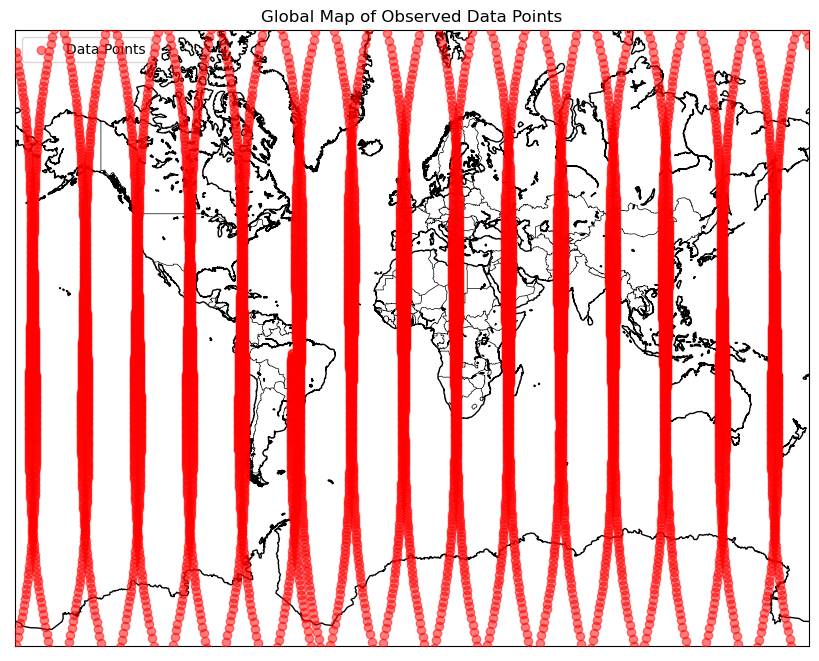

In [63]:
import cdflib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Load the CDF file
cdf_file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'
cdf = cdflib.CDF(cdf_file_path)

# Extract latitude and longitude data from the CDF file
latitude = cdf.varget('latitude')
longitude = cdf.varget('longitude')

# Create a figure and axis for the map
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Create a Basemap object for plotting
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='l')
m.drawcoastlines()
m.drawcountries()

# Plot the data points
x, y = m(longitude, latitude)
m.scatter(x, y, marker='o', color='red',alpha=0.5, zorder=10, label='Data Points')

# Customize the plot (title, legend, etc.)
plt.title('Global Map of Observed Data Points')
plt.legend(loc='best')
plt.show()






##### Add the orbit altitude as color information to the plot. Use a colorbar or color limits from 480– 500 km

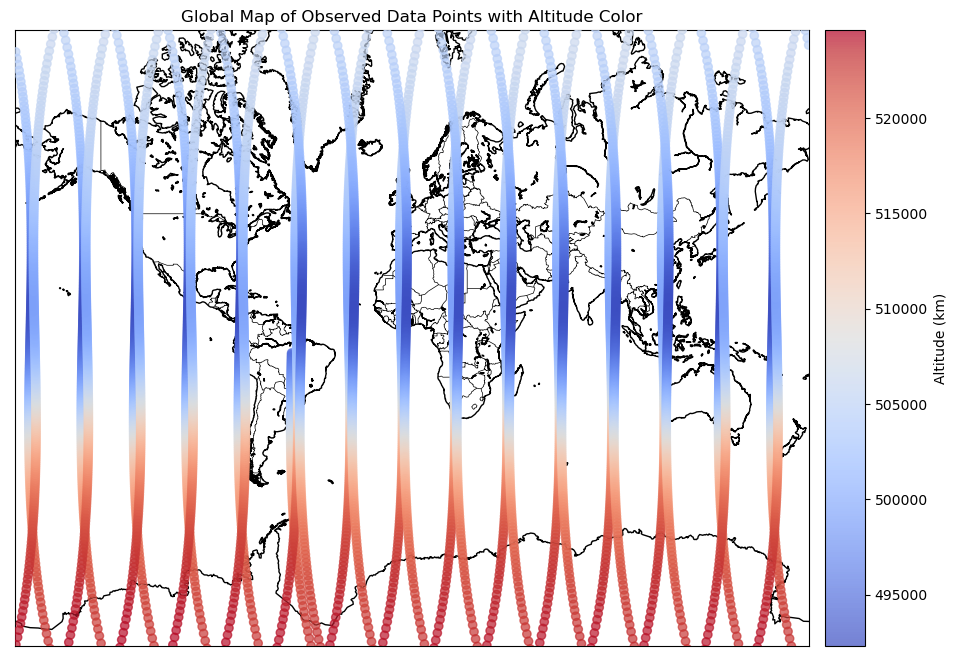

In [60]:
# Load the CDF file
cdf_file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'
cdf = cdflib.CDF(cdf_file_path)


# Create a figure and axis for the map
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Create a Basemap object for plotting
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='l')
m.drawcoastlines()
m.drawcountries()

# Extract latitude, longitude, and altitude data from the CDF file
latitude = cdf.varget('latitude')
longitude = cdf.varget('longitude')
altitude = cdf.varget('altitude')  

# Define color limits for altitude
altitude_min = 480000  # Minimum altitude in km
altitude_max = 520000  # Maximum altitude in km


# Create a colormap (you can change this to any other colormap)
cmap = plt.get_cmap('coolwarm')

# Plot the data points with altitude as color
x, y = m(longitude, latitude)
sc = m.scatter(x, y, c=altitude, cmap=cmap, alpha=0.7, marker='o', zorder=10)


# Add a colorbar to the plot
cbar = m.colorbar(sc, location='right', label='Altitude (km)')

# Customize the plot (title, legend, etc.)
plt.title('Global Map of Observed Data Points with Altitude Color')
plt.show()



##### Generate a global map and plot the local solar time as color information to the observation location

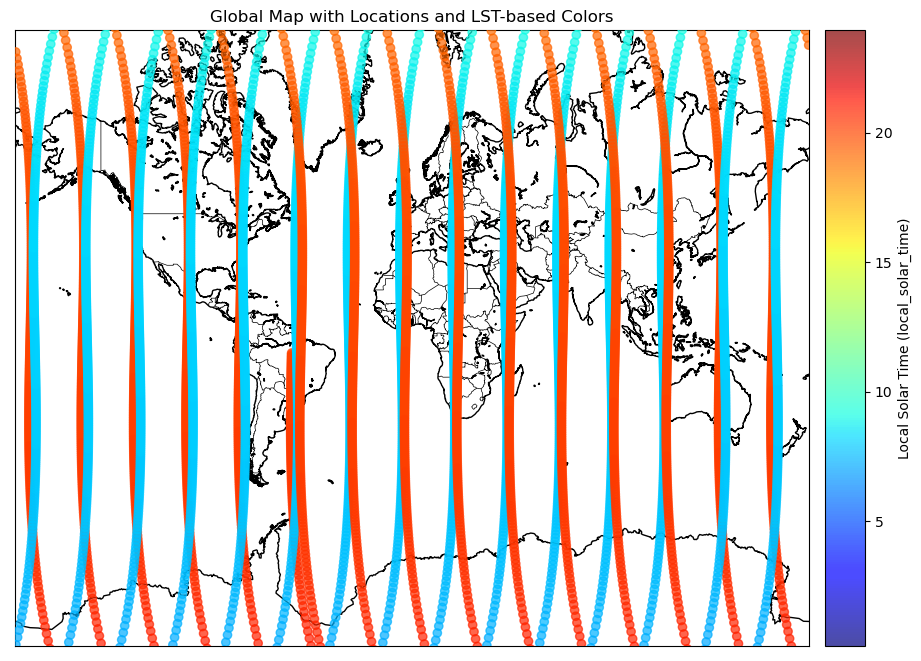

In [59]:
# Load the CDF file
cdf_file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'
cdf = cdflib.CDF(cdf_file_path)


# Create a figure and axis for the map
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Create a Basemap object for plotting
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='l')
m.drawcoastlines()
m.drawcountries()

# Extract latitude, longitude, and local solar time data from the CDF file
latitude = cdf.varget('latitude')
longitude = cdf.varget('longitude')
local_solar_time = cdf.varget('local_solar_time')  

# Create a colormap (you can change this to any other colormap)
cmap = plt.get_cmap('jet')

# Plot the data points with local solar time as color
x, y = m(longitude, latitude)
sc = m.scatter(x, y, c=local_solar_time, cmap=cmap, alpha=0.7, marker='o', zorder=10)


# Add a colorbar to the plot
cbar = m.colorbar(sc, location='right', label='Local Solar Time (local_solar_time)')

# Add a title and display the map
plt.title('Global Map with Locations and LST-based Colors')
plt.show()


##### Separate data for the two different LST zones

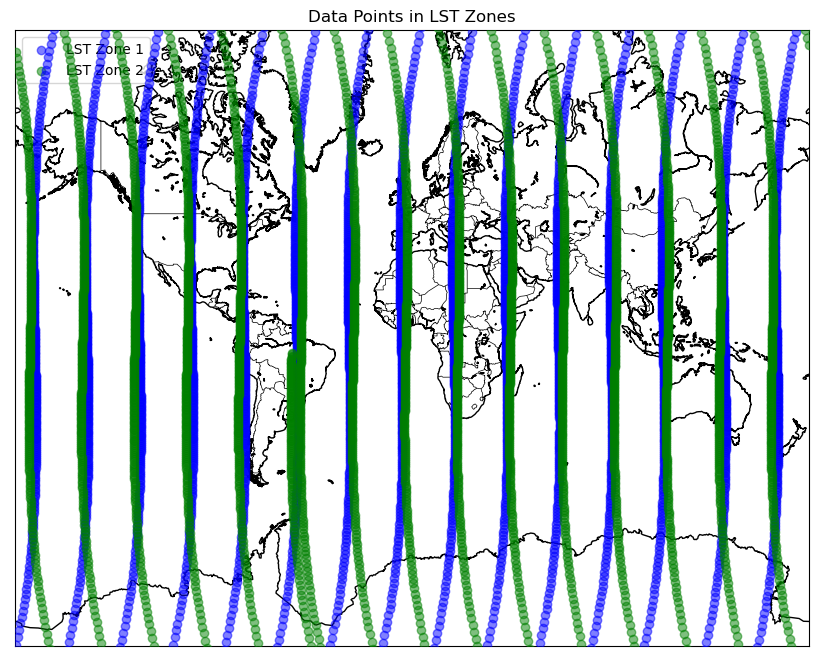

In [12]:
from mpl_toolkits.basemap import Basemap

# Load the CDF file
cdf_file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'
cdf = cdflib.CDF(cdf_file_path)

# Create a figure and axis for the map
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Create a Basemap object for plotting
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='l')
m.drawcoastlines()
m.drawcountries()

# Extract latitude, longitude, and LST data from the CDF file
latitude = cdf.varget('latitude')
longitude = cdf.varget('longitude') 
lst_data = cdf.varget('local_solar_time')  

# Define the LST boundaries for two zones
lst_zone1_start = 0.0  #  start time for the first zone (e.g., 0.0 for midnight)
lst_zone1_end = 12.0  # end time for the first zone (e.g., 12.0 for noon)

lst_zone2_start = 12.0  #  start time for the second zone (e.g., noon)
lst_zone2_end = 24.0  # end time for the second zone (e.g., 24.0 for midnight)

# Create masks for the two LST zones
mask_zone1 = (lst_data >= lst_zone1_start) & (lst_data < lst_zone1_end)
mask_zone2 = (lst_data >= lst_zone2_start) & (lst_data < lst_zone2_end)

# Plot the data points for LST Zone 1
x_zone1, y_zone1 = m(longitude[mask_zone1], latitude[mask_zone1])
m.scatter(x_zone1, y_zone1, c='blue', marker='o', alpha=0.5, label='LST Zone 1', zorder=10)

# Plot the data points for LST Zone 2
x_zone2, y_zone2 = m(longitude[mask_zone2], latitude[mask_zone2])
m.scatter(x_zone2, y_zone2, c='green', marker='o', alpha=0.5, label='LST Zone 2', zorder=10)

# Customize the plot (title, legend, etc.)
plt.title('Data Points in LST Zones')
plt.legend(loc='best')
plt.show()




##### Plot densities into a global map for the two LSTs separately

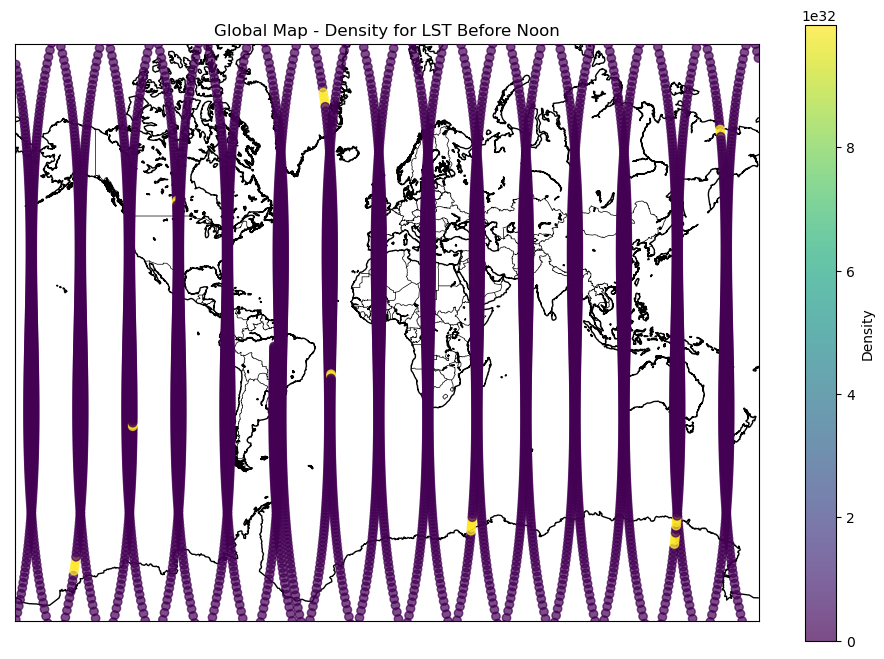

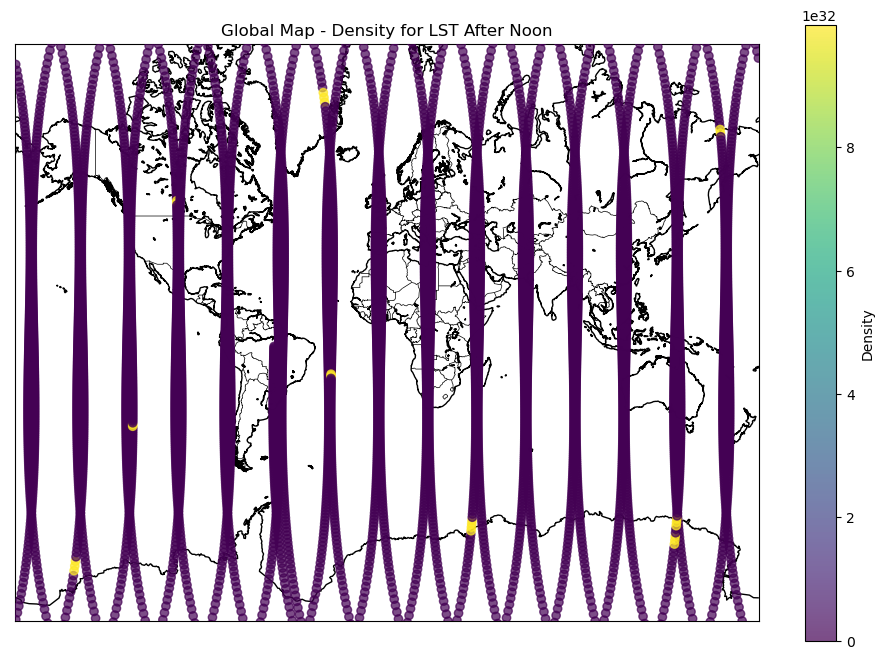

In [14]:
# Load the CDF file
cdf_file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'
cdf = cdflib.CDF(cdf_file_path)

# Extract latitude, longitude, and LST data from the CDF file
latitude = cdf.varget('latitude')
longitude = cdf.varget('longitude') 
lst_data = cdf.varget('local_solar_time') 
density = cdf.varget('density')

# Define the LST boundaries for two zones
lst_zone1_start = 0.0  #  start time for the first zone (e.g., 0.0 for midnight)
lst_zone1_end = 12.0  # end time for the first zone (e.g., 12.0 for noon)

lst_zone2_start = 12.0  #  start time for the second zone (e.g., noon)
lst_zone2_end = 24.0  # end time for the second zone (e.g., 24.0 for midnight)
    
# Create masks for the two LST zones
mask_zone1 = (lst_data >= lst_zone1_start) & (lst_data < lst_zone1_end)
mask_zone2 = (lst_data >= lst_zone2_start) & (lst_data < lst_zone2_end)

# Create a function to plot data on a global map
def plot_global_map(data, title):
    
    # Create a figure and axis for the map
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    
    # Create a Basemap object for plotting
    m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='l')
    m.drawcoastlines()
    m.drawcountries()
    
    
    
    # Create a colormap (you can change this to any other colormap)
    cmap = plt.get_cmap('viridis')
    
    # Plot the data points with density as color
    x, y = m(longitude, latitude)
    sc = m.scatter(x, y, c=density, cmap=cmap, alpha=0.7, marker='o', zorder=10)
    
    
    
    
    # Add a colorbar for density values
    cbar = plt.colorbar(sc, ax=ax, label='Density')
    

    # Add a title
    plt.title(title)
    plt.show()
    
# Plot the global map for LST before noon
plot_global_map(mask_zone1, 'Global Map - Density for LST Before Noon')

# Plot the global map for LST after noon
plot_global_map(mask_zone2, 'Global Map - Density for LST After Noon')


##### Find the outlier from dataset using density and time columns

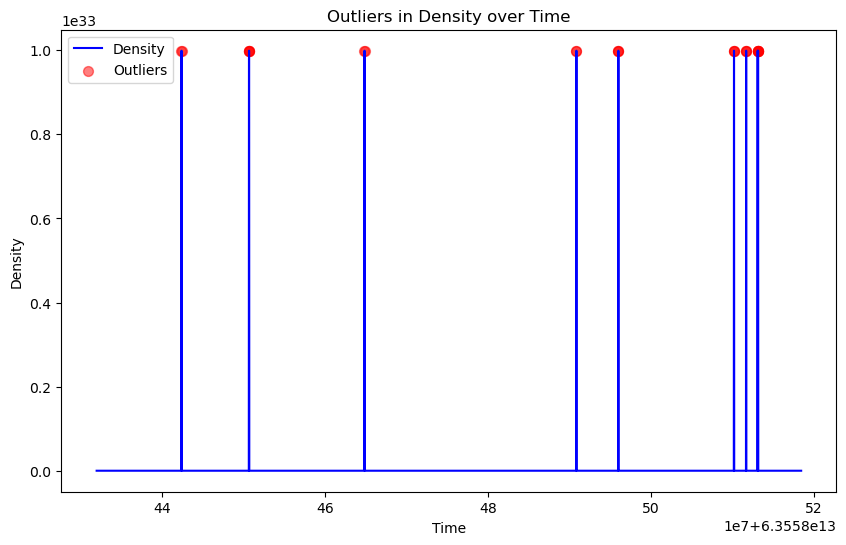

In [3]:
import cdflib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Swarm CDF file
data = cdflib.CDF('SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf')  # Replace 'your_swarm_data.cdf' with your CDF file

# Access time and density data and convert them to NumPy arrays
timestamps = np.array(data['time'])  # Replace 'Time_column' with the actual variable name in your file
density_values = np.array(data['density'])  # Replace 'Density_column' with the actual variable name in your file

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(timestamps, density_values, color='blue', label='Density')

# Calculate outliers using z-score method
threshold = 2
outliers = np.abs((density_values - np.mean(density_values)) / np.std(density_values)) > threshold

# Plot outliers
plt.scatter(timestamps[outliers], density_values[outliers], color='red', label='Outliers', s=50, alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Outliers in Density over Time')
plt.legend()
plt.show()


### Plot density over time after removing outliers

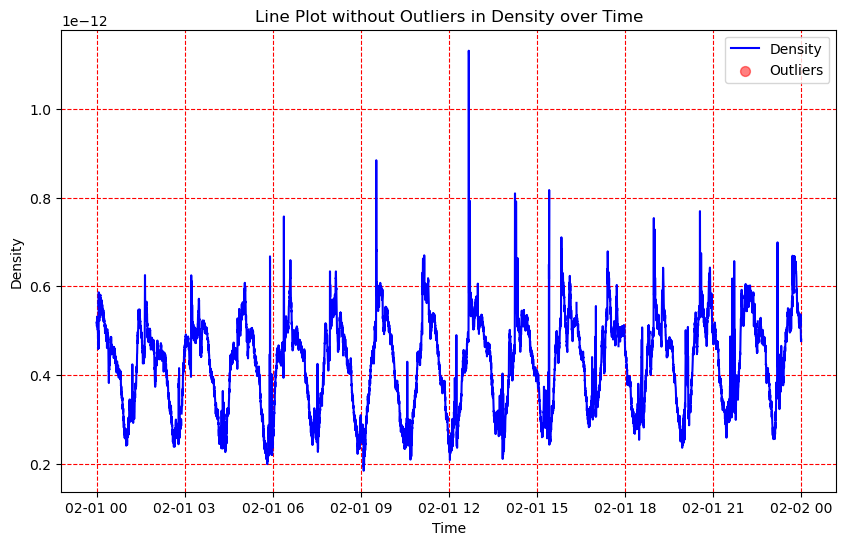

In [58]:
import spacepy.pycdf as cdf
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import cdflib


# Load Swarm CDF file
data = cdf.CDF('SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf')  # Replace 'your_swarm_data.cdf' with your CDF file


# Access time and density data and convert them to NumPy arrays
timestamps = np.array(data['time'])  # Replace 'Time_column' with the actual variable name in your file
density_values = np.array(data['density'])  # Replace 'Density_column' with the actual variable name in your file

# Calculate z-scores to identify outliers
z_scores = (density_values - np.mean(density_values)) / np.std(density_values)

# Set a threshold for z-scores to identify outliers
threshold = 2
outliers = np.abs(z_scores) > threshold

# Fill outlier points with NaN
density_values[outliers] = np.nan

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(timestamps, density_values, color='blue', label='Density')


# Mark outliers on the plot
plt.scatter(timestamps[outliers], density_values[outliers], color='red', label='Outliers', s=50, alpha=0.5)

# Specify grid with line attributes
plt.grid(color='r', linestyle='--')



plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Line Plot without Outliers in Density over Time')

plt.legend()
plt.show()


### Plot densities of one day into a global map for the two LSTs separately (removal of outliers necessary)

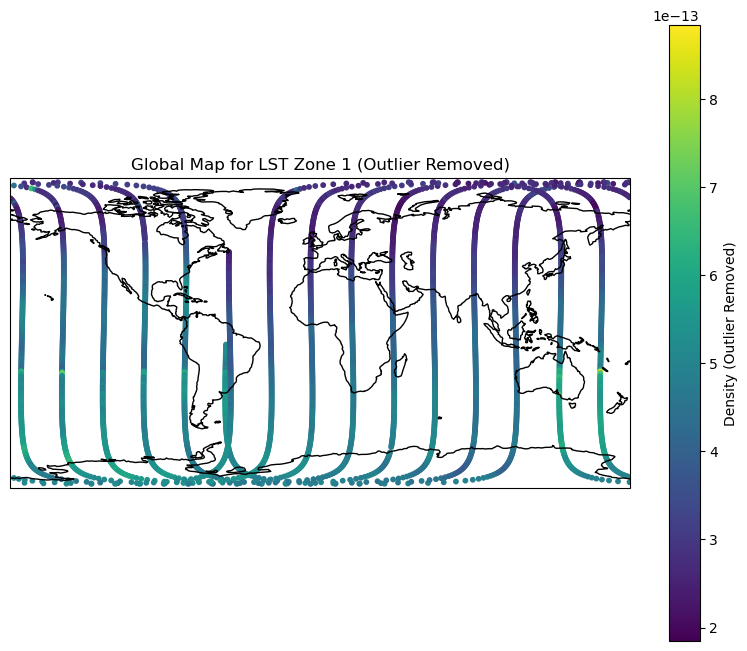

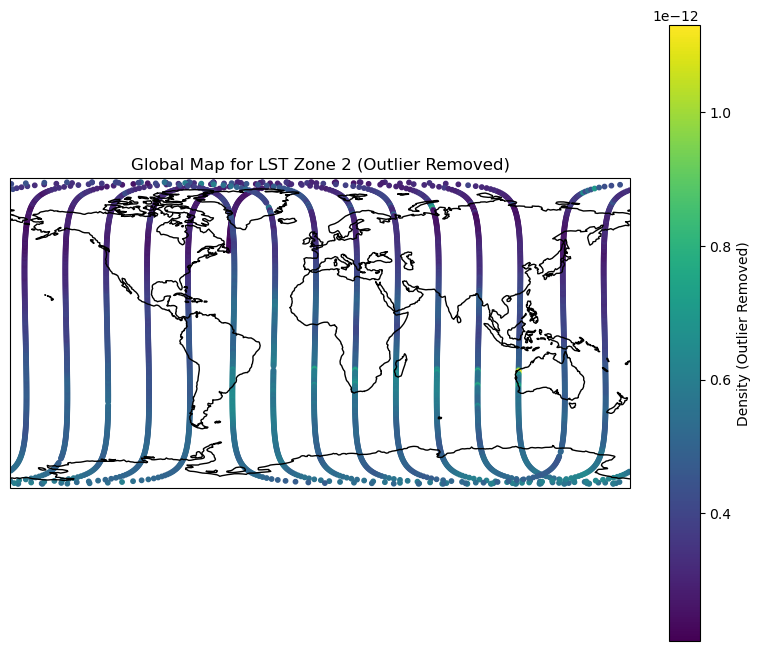

In [12]:
import spacepy.pycdf as cdf
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from datetime import datetime


# Load Swarm CDF file
data = cdf.CDF('SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf')  # Replace 'your_swarm_data.cdf' with your CDF file

# Access necessary data (e.g., latitude, longitude, density, and time)
latitude = np.array(data['latitude'])  # Replace with actual variable name
longitude = np.array(data['longitude'])  # Replace with actual variable name
density = np.array(data['density'])  # Replace with actual variable name
time = np.array(data['time'])  # Replace with actual variable name

# Convert datetime objects to hours for comparison
hours = np.array([t.hour for t in time])

# Divide time into two Local Solar Time (LST) zones
# Assuming LST values are in the range [0, 24)
lst_zone1_mask = (hours >= 0) & (hours < 12)
lst_zone2_mask = (hours >= 12) & (hours < 24)

# Identify and remove outliers in density
def remove_outliers(data, threshold=2):
    z_scores = (data - np.nanmean(data)) / np.nanstd(data)
    outliers = np.abs(z_scores) > threshold
    data[outliers] = np.nan
    return data

density_no_outliers1 = remove_outliers(density[lst_zone1_mask])
density_no_outliers2 = remove_outliers(density[lst_zone2_mask])

# Plot global map for LST Zone 1 with outlier-removed density
plt.figure(figsize=(10, 8))
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.coastlines()
sc1 = ax1.scatter(longitude[lst_zone1_mask], latitude[lst_zone1_mask], c=density_no_outliers1, cmap='viridis', s=10, transform=ccrs.PlateCarree())
plt.colorbar(sc1, label='Density (Outlier Removed)')
plt.title('Global Map for LST Zone 1 (Outlier Removed)')
plt.show()

# Plot global map for LST Zone 2 with outlier-removed density
plt.figure(figsize=(10, 8))
ax2 = plt.axes(projection=ccrs.PlateCarree())
ax2.coastlines()
sc2 = ax2.scatter(longitude[lst_zone2_mask], latitude[lst_zone2_mask], c=density_no_outliers2, cmap='viridis', s=10, transform=ccrs.PlateCarree())
plt.colorbar(sc2, label='Density (Outlier Removed)')
plt.title('Global Map for LST Zone 2 (Outlier Removed)')
plt.show()


In [13]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


### write a code for automatic download of Swarm data, a full year data

In [19]:
import requests
import os
from datetime import datetime, timedelta

def download_swarm_data_for_year(year, product='DNSx_ACC', level='2', output_dir='swarm_data'):
    # Specify Swarm API URL
    swarm_api_url = 'https://swarm-diss.eo.esa.int/#swarm%2FLevel2daily%2FLatest_baselines%2FDNS%2FACC%2FSat_C'

    # Iterate over each day of the specified year
    start_date = datetime(2014, 1, 1)
    end_date = datetime(2014, 12, 31)

    current_date = start_date
    while current_date <= end_date:
        current_date_str = current_date.strftime('%Y%m%d')

        # Specify URL for the data file
        data_url = f'{swarm_api_url}/{product}/{level}/{current_date_str}'

        # Download the data file
        response = requests.get(data_url, stream=True)
        if response.status_code == 200:
            # Create output directory if it doesn't exist
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)

            # Save the data file
            output_file = os.path.join(output_dir, f'SW_{product}_{level}_{current_date_str}.CDF')
            with open(output_file, 'wb') as file:
                for chunk in response.iter_content(chunk_size=1024):
                    file.write(chunk)

            print(f'Downloaded: {output_file}')
        else:
            print(f'Failed to download data for {current_date_str}. Status Code: {response.status_code}')

        # Move to the next day
        current_date += timedelta(days=1)

# Example usage: Download Swarm data for the year 2014
download_swarm_data_for_year(2014, output_dir='path/directory')


Downloaded: path/directory\SW_DNSx_ACC_2_20140101.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140102.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140103.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140104.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140105.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140106.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140107.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140108.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140109.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140110.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140111.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140112.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140113.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140114.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140115.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140116.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140117.CDF
Downloaded: path/directory\SW_DNSx_ACC_2_20140118.CDF
Downloaded: path/directory\S

In [2]:
import cdflib

def read_cdf(file_path):
    
    cdf_file = cdflib.CDF(file_path)

    latitude_var_name = 'latitude'
    longitude_var_name = 'longitude'

    
    latitude_values = cdf_file[latitude_var_name][...]
    longitude_values = cdf_file[longitude_var_name][...]

   
    del cdf_file

    return latitude_values, longitude_values

def print_coordinates(latitude_values, longitude_values):
    for lat, lon in zip(latitude_values, longitude_values):
        print(f"latitude: {lat}, longitude: {lon}")

if __name__ == "__main__":
    file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'
    latitude_values, longitude_values = read_cdf(file_path)
    print_coordinates(latitude_values, longitude_values)


latitude: -6.712438757145884, longitude: -54.57183533152135
latitude: -7.350847632689601, longitude: -54.58601967168454
latitude: -7.989212093126568, longitude: -54.60012637550779
latitude: -8.627529969412496, longitude: -54.614148298101576
latitude: -9.265799106511272, longitude: -54.6280782021798
latitude: -9.904017341791974, longitude: -54.64190876437733
latitude: -10.542182559362784, longitude: -54.65563255169952
latitude: -11.180292648460451, longitude: -54.66924204313443
latitude: -11.818345507717105, longitude: -54.682729568344584
latitude: -12.456339061226805, longitude: -54.69608735627143
latitude: -13.094271239344959, longitude: -54.709307498996104
latitude: -13.732140020595777, longitude: -54.72238193478768
latitude: -14.369943381109907, longitude: -54.735302441493396
latitude: -15.00767931265816, longitude: -54.748060663091195
latitude: -15.645345836880804, longitude: -54.76064802850881
latitude: -16.28294101760187, longitude: -54.77305581551698
latitude: -16.92046290494749

### Read a full year of Swarm densities and plot into one time series (outliers removed). X-axis time, y-axis density.

### Different Outlier Detection Methods

#### 1.  Identify outliers by finding rows that differ from the mean column value by more than 1.5 standard deviations

In [22]:
import pandas as pd
import spacepy.pycdf as cdf

file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'

with cdf.CDF(file_path) as cdf_file:
    variable_names = list(cdf_file.keys())
    variable_values = {}
    
    for variable_name in variable_names:
        variable_values[variable_name] = cdf_file[variable_name][...].tolist()
        
df = pd.DataFrame(variable_values)
df.drop(columns=['altitude','latitude','longitude','local_solar_time'], inplace=True)
df['outliers'] = 0
df.loc[(df.density - df.density.mean()).abs() > 1.5*df.density.std(), 'outliers'] = 1
df2 = df[df.outliers == 1].reset_index(drop=True)
df = df[df.outliers == 0].reset_index(drop=True)
print(df2)
print(df)

                  time       density  outliers
0  2014-02-01 02:53:20  9.990000e+32         1
1  2014-02-01 02:53:30  9.990000e+32         1
2  2014-02-01 05:11:10  9.990000e+32         1
3  2014-02-01 05:11:20  9.990000e+32         1
4  2014-02-01 05:11:30  9.990000e+32         1
5  2014-02-01 05:11:40  9.990000e+32         1
6  2014-02-01 09:07:20  9.990000e+32         1
7  2014-02-01 09:07:30  9.990000e+32         1
8  2014-02-01 16:20:20  9.990000e+32         1
9  2014-02-01 16:20:30  9.990000e+32         1
10 2014-02-01 17:46:00  9.990000e+32         1
11 2014-02-01 17:46:10  9.990000e+32         1
12 2014-02-01 17:46:20  9.990000e+32         1
13 2014-02-01 21:42:20  9.990000e+32         1
14 2014-02-01 21:42:30  9.990000e+32         1
15 2014-02-01 21:42:40  9.990000e+32         1
16 2014-02-01 22:07:10  9.990000e+32         1
17 2014-02-01 22:07:20  9.990000e+32         1
18 2014-02-01 22:07:30  9.990000e+32         1
19 2014-02-01 22:30:40  9.990000e+32         1
20 2014-02-01

### Standard Deviation Method/Z-Score Method:

The Z-score measures how many standard deviations a data point is from the mean. Data points with a Z-score beyond a certain threshold (commonly 2 or 3) are considered outliers.

In [42]:
import pandas as pd
import spacepy.pycdf as cdf
import numpy as np
from scipy import stats


file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'

with cdf.CDF(file_path) as cdf_file:
    variable_names = list(cdf_file.keys())
    variable_values = {}
    
    for variable_name in variable_names:
        variable_values[variable_name] = cdf_file[variable_name][...].tolist()
        
df = pd.DataFrame(variable_values)
df.drop(columns=['altitude','latitude','longitude','local_solar_time'], inplace=True)
threshold = 3
z_scores = (df['density'] - df['density'].mean()) / df['density'].std()
outliers = df[abs(z_scores) > threshold]
outliers_reset_index = outliers.reset_index(drop=True)

print("Original DataFrame:")
print(df)
print("\nOutliers using Standard Deviation Method:")
print(outliers_reset_index)

Original DataFrame:
                    time       density
0    2014-02-01 00:00:00  5.184454e-13
1    2014-02-01 00:00:10  5.173494e-13
2    2014-02-01 00:00:20  5.178510e-13
3    2014-02-01 00:00:30  5.099569e-13
4    2014-02-01 00:00:40  5.106715e-13
...                  ...           ...
8635 2014-02-01 23:59:10  4.885602e-13
8636 2014-02-01 23:59:20  4.819704e-13
8637 2014-02-01 23:59:30  4.785112e-13
8638 2014-02-01 23:59:40  4.822021e-13
8639 2014-02-01 23:59:50  4.767876e-13

[8640 rows x 2 columns]

Outliers using Standard Deviation Method:
                  time       density
0  2014-02-01 02:53:20  9.990000e+32
1  2014-02-01 02:53:30  9.990000e+32
2  2014-02-01 05:11:10  9.990000e+32
3  2014-02-01 05:11:20  9.990000e+32
4  2014-02-01 05:11:30  9.990000e+32
5  2014-02-01 05:11:40  9.990000e+32
6  2014-02-01 09:07:20  9.990000e+32
7  2014-02-01 09:07:30  9.990000e+32
8  2014-02-01 16:20:20  9.990000e+32
9  2014-02-01 16:20:30  9.990000e+32
10 2014-02-01 17:46:00  9.990000e+32


### Interquartile Range (IQR) Method:

The interquartile range is the range between the first quartile (Q1) and the third quartile (Q3) of a dataset. Data points outside the range are considered outliers.

In [41]:
import pandas as pd
import spacepy.pycdf as cdf
import numpy as np


file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'

with cdf.CDF(file_path) as cdf_file:
    variable_names = list(cdf_file.keys())
    variable_values = {}
    
    for variable_name in variable_names:
        variable_values[variable_name] = cdf_file[variable_name][...].tolist()
        
df = pd.DataFrame(variable_values)
df.drop(columns=['altitude','latitude','longitude','local_solar_time'], inplace=True)


q1 = df['density'].quantile(0.25)
q3 = df['density'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['density'] < lower_bound) | (df['density'] > upper_bound)]
outliers_reset_index = outliers.reset_index(drop=True)

print("\nOutliers using IQR Method:")
print(outliers_reset_index)



Outliers using IQR Method:
                  time       density
0  2014-02-01 02:53:20  9.990000e+32
1  2014-02-01 02:53:30  9.990000e+32
2  2014-02-01 05:11:10  9.990000e+32
3  2014-02-01 05:11:20  9.990000e+32
4  2014-02-01 05:11:30  9.990000e+32
5  2014-02-01 05:11:40  9.990000e+32
6  2014-02-01 06:22:40  7.573899e-13
7  2014-02-01 09:07:20  9.990000e+32
8  2014-02-01 09:07:30  9.990000e+32
9  2014-02-01 09:31:30  8.840953e-13
10 2014-02-01 12:40:20  9.281122e-13
11 2014-02-01 12:40:30  1.130835e-12
12 2014-02-01 12:40:40  1.118899e-12
13 2014-02-01 12:40:50  8.503139e-13
14 2014-02-01 12:42:50  7.924419e-13
15 2014-02-01 14:15:00  8.094519e-13
16 2014-02-01 14:17:10  7.914174e-13
17 2014-02-01 15:24:50  8.169433e-13
18 2014-02-01 16:20:20  9.990000e+32
19 2014-02-01 16:20:30  9.990000e+32
20 2014-02-01 17:46:00  9.990000e+32
21 2014-02-01 17:46:10  9.990000e+32
22 2014-02-01 17:46:20  9.990000e+32
23 2014-02-01 20:33:00  7.694144e-13
24 2014-02-01 21:42:20  9.990000e+32
25 2014-02

In [44]:
pip install scikit-learn


   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.3 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.3/9.3 MB 2.6 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/9.3 MB 4.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/9.3 MB 5.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.3 MB 5.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.3 MB 6.3 MB/s eta 0:00:02
   --------- ------------------------------ 2.1/9.3 MB 6.8 MB/s eta 0:00:02
   ---------- ----------------------------- 2.5/9.3 MB 6.6 MB/s eta 0:00:02
   ------------ --------------------------- 3.0/9.3 MB 7.0 MB/s eta 0:00:01
   -------------- ------------------------- 3.4/9.3 MB 7.4 MB/s eta 0:00:01
   ---------------- ----------------------- 3.8/9.3 MB 7.3 MB/s eta 0:00:01
   ------------------ --------------------- 4.2/9.3 MB 7.4 MB/s eta 0:00:01
   ----------------

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
DBSCAN is a clustering algorithm that can also be used for outlier detection. Outliers are data points that do not belong to any cluster.

In [53]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np


file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'

with cdf.CDF(file_path) as cdf_file:
    variable_names = list(cdf_file.keys())
    variable_values = {}
    
    for variable_name in variable_names:
        variable_values[variable_name] = cdf_file[variable_name][...].tolist()
        
df = pd.DataFrame(variable_values)
df.drop(columns=['altitude','latitude','longitude','local_solar_time'], inplace=True)
eps = 3 
min_samples = 200
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df['Cluster'] = dbscan.fit_predict(df[['density']])

outliers_dbscan = df[df['Cluster'] == -1]
outliers_dbscan_reset_index = outliers_dbscan.reset_index(drop=True)

print("\nOutliers using DBSCAN Method:")
print(outliers_dbscan_reset_index)




Outliers using DBSCAN Method:
                  time       density  Cluster
0  2014-02-01 02:53:20  9.990000e+32       -1
1  2014-02-01 02:53:30  9.990000e+32       -1
2  2014-02-01 05:11:10  9.990000e+32       -1
3  2014-02-01 05:11:20  9.990000e+32       -1
4  2014-02-01 05:11:30  9.990000e+32       -1
5  2014-02-01 05:11:40  9.990000e+32       -1
6  2014-02-01 09:07:20  9.990000e+32       -1
7  2014-02-01 09:07:30  9.990000e+32       -1
8  2014-02-01 16:20:20  9.990000e+32       -1
9  2014-02-01 16:20:30  9.990000e+32       -1
10 2014-02-01 17:46:00  9.990000e+32       -1
11 2014-02-01 17:46:10  9.990000e+32       -1
12 2014-02-01 17:46:20  9.990000e+32       -1
13 2014-02-01 21:42:20  9.990000e+32       -1
14 2014-02-01 21:42:30  9.990000e+32       -1
15 2014-02-01 21:42:40  9.990000e+32       -1
16 2014-02-01 22:07:10  9.990000e+32       -1
17 2014-02-01 22:07:20  9.990000e+32       -1
18 2014-02-01 22:07:30  9.990000e+32       -1
19 2014-02-01 22:30:40  9.990000e+32       -1
20 

### Local Outlier Factor (LOF):

LOF measures the local density deviation of a data point with respect to its neighbors. Points with significantly lower density are considered outliers.

In [56]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import numpy as np


file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'

with cdf.CDF(file_path) as cdf_file:
    variable_names = list(cdf_file.keys())
    variable_values = {}
    
    for variable_name in variable_names:
        variable_values[variable_name] = cdf_file[variable_name][...].tolist()
        
df = pd.DataFrame(variable_values)
df.drop(columns=['altitude','latitude','longitude','local_solar_time'], inplace=True)

n_neighbors = 200
lof = LocalOutlierFactor(n_neighbors=n_neighbors)
df['LOF_Score'] = lof.fit_predict(df[['density']])

outliers_lof = df[df['LOF_Score'] == -1]
outliers_lof_reset_index = outliers_lof.reset_index(drop=True)

print("\nOutliers using LOF Method:")
print(outliers_lof_reset_index)


Outliers using LOF Method:
                  time       density  LOF_Score
0  2014-02-01 02:53:20  9.990000e+32         -1
1  2014-02-01 02:53:30  9.990000e+32         -1
2  2014-02-01 05:11:10  9.990000e+32         -1
3  2014-02-01 05:11:20  9.990000e+32         -1
4  2014-02-01 05:11:30  9.990000e+32         -1
5  2014-02-01 05:11:40  9.990000e+32         -1
6  2014-02-01 09:07:20  9.990000e+32         -1
7  2014-02-01 09:07:30  9.990000e+32         -1
8  2014-02-01 16:20:20  9.990000e+32         -1
9  2014-02-01 16:20:30  9.990000e+32         -1
10 2014-02-01 17:46:00  9.990000e+32         -1
11 2014-02-01 17:46:10  9.990000e+32         -1
12 2014-02-01 17:46:20  9.990000e+32         -1
13 2014-02-01 21:42:20  9.990000e+32         -1
14 2014-02-01 21:42:30  9.990000e+32         -1
15 2014-02-01 21:42:40  9.990000e+32         -1
16 2014-02-01 22:07:10  9.990000e+32         -1
17 2014-02-01 22:07:20  9.990000e+32         -1
18 2014-02-01 22:07:30  9.990000e+32         -1
19 2014-02-0

#### Lag and Lead

In [12]:
import pandas as pd
import spacepy.pycdf as cdf


file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'

with cdf.CDF(file_path) as cdf_file:
    variable_names = list(cdf_file.keys())
    variable_values = {}
    
    for variable_name in variable_names:
        variable_values[variable_name] = cdf_file[variable_name][...].tolist()
        
df = pd.DataFrame(variable_values)
df.drop(columns=['altitude','latitude','longitude','local_solar_time'], inplace=True)
#df.rolling(window = 10, on='time').density.mean()
df['density_lag'] = df['density'].shift(1)but 
df['density_lead'] = df.density.shift(-1)
df.head()
df.tail()

time       density   density_lag  density_lead
8635 2014-02-01 23:59:10  4.885602e-13  4.959258e-13  4.819704e-13
8636 2014-02-01 23:59:20  4.819704e-13  4.885602e-13  4.785112e-13
8637 2014-02-01 23:59:30  4.785112e-13  4.819704e-13  4.822021e-13
8638 2014-02-01 23:59:40  4.822021e-13  4.785112e-13  4.767876e-13
8639 2014-02-01 23:59:50  4.767876e-13  4.822021e-13           NaN

#### 3 minute moving average

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


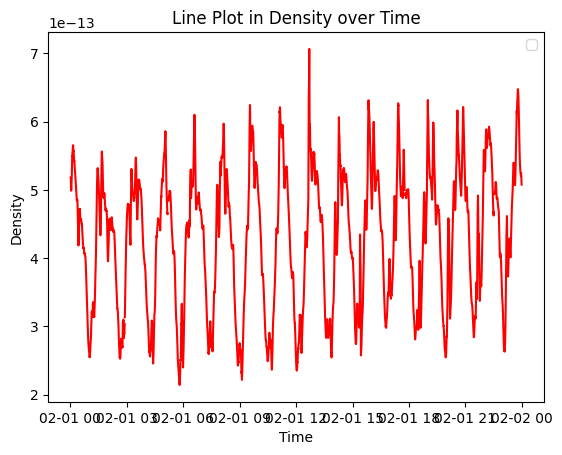

In [4]:
import pandas as pd
import spacepy.pycdf as cdf
import matplotlib.pyplot as plt
import numpy as np

file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'

with cdf.CDF(file_path) as cdf_file:
    variable_names = list(cdf_file.keys())
    variable_values = {}
    
    for variable_name in variable_names:
        variable_values[variable_name] = cdf_file[variable_name][...].tolist()
        
df = pd.DataFrame(variable_values)
df.drop(columns=['altitude','latitude','longitude','local_solar_time'], inplace=True)
threshold = 3
z_scores = (df['density'] - df['density'].mean()) / df['density'].std()
outliers = df[abs(z_scores) > threshold]
df[abs(z_scores) > threshold] = np.nan
df.set_index('time', inplace=True)
window_size = 6*3
rolling_avg = df['density'].rolling(window=window_size, center=True, min_periods = 15).mean()
df['3min_rolling_avg'] = rolling_avg
rolling_sum = df['density'].rolling(window=window_size).sum()
df['3min_rolling_sum'] = rolling_sum
df.head(30)

plt.plot(rolling_avg, color='red')

plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Line Plot in Density over Time')
plt.savefig('3min_rollavg_plot.png')
plt.legend()
plt.show()


### Download the zip files from swarm ftp server and extract cdf file from zip files

In [1]:
from ftplib import FTP
import os
import zipfile

ftp_url = 'swarm-diss.eo.esa.int'
ftp = FTP(ftp_url)

# Login to the FTP server (if authentication is required)
# Replace 'username' and 'password' with your credentials if needed
ftp.login()

# Change to the directory containing the ZIP file and files to download
directory_path = '/Level2daily/Latest_baselines/DNS/ACC/Sat_C'  # Replace with the directory path you want to navigate to
ftp.cwd(directory_path)

# List files in the directory
file_list = []
ftp.dir(file_list.append)

# Filter filenames from the list of files
file_list = [line.split()[-1] for line in file_list if line.startswith('-')]

# Download each file in the directory to the local directory
local_directory = 'New folder'
os.makedirs(local_directory, exist_ok=True)

print('Download Started.')
for filename in file_list:
    local_filename = os.path.join(local_directory, filename)
    with open(local_filename, 'wb') as file:
        ftp.retrbinary(f"RETR {filename}", file.write)
        print(filename)
print('Download finished.')

# Find and extract .zip file
zip_files = [file for file in file_list if file.endswith('.zip')]
directory_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/New folder'  # Replace with the directory path you want to list

# List all files and directories in the specified directory
files_in_directory = os.listdir(directory_path)

# Filter out only files (excluding directories)
zip_files = [file for file in files_in_directory if file.endswith('.ZIP')]
print(zip_files)
if zip_files:
    for zip_filename in zip_files:
    #zip_filename = zip_files[0]  # Use the first ZIP file found
        local_zip_path = os.path.join(local_directory, zip_filename)

        # Download the ZIP file
        with open(local_zip_path, 'wb') as file:
            ftp.retrbinary(f"RETR {zip_filename}", file.write)

        # Extract .cdf files from the ZIP
        with zipfile.ZipFile(local_zip_path, 'r') as zip_ref:
            cdf_files = [name for name in zip_ref.namelist() if name.endswith('.cdf')]
            print(cdf_files)
            extracted_cdf_directory = 'extracted_cdf'
            os.makedirs(extracted_cdf_directory, exist_ok=True)

            for cdf_file in cdf_files:
                zip_ref.extract(cdf_file, path=extracted_cdf_directory)

ftp.quit()

Download Started.
SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140202T000000_20140202T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140203T000000_20140203T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140204T000000_20140204T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140205T000000_20140205T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140206T000000_20140206T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140207T000000_20140207T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140208T000000_20140208T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140209T000000_20140209T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140210T000000_20140210T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140211T000000_20140211T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140212T000000_20140212T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140213T000000_20140213T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140214T000000_20140214T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140215T000000_20140215T235950_0201.ZIP
SW_OPER_DNSCACC_2__20140216T000000_20140216T235950_0201.ZIP
SW_OPER_DNSCACC_2__201

'221-Goodbye. You uploaded 0 and downloaded 2198704 kbytes.\n221 Logout.'

### Extract  files of 2014

In [119]:
import os
from datetime import datetime, timedelta
import shutil
import re

def extract_files_by_year(directory_path, target_year):
    for filename in os.listdir(directory_path):
        if filename.endswith('.cdf'):
            # Extract timestamps from the filename using a regular expression
            match = re.match(r'SW_OPER_DNSCACC_2__(\d{4})(\d{2})(\d{2})T(\d{2})(\d{2})(\d{2})_(\d{4})(\d{2})(\d{2})T(\d{2})(\d{2})(\d{2})_(\d+).cdf', filename)

            if match:
                start_year, start_month, start_day, start_hour, start_minute, start_second, end_year, end_month, end_day, end_hour, end_minute, end_second, version = match.groups()

                # Construct datetime objects for start and end timestamps
                start_timestamp = datetime(int(start_year), int(start_month), int(start_day), int(start_hour), int(start_minute), int(start_second))
                end_timestamp = datetime(int(end_year), int(end_month), int(end_day), int(end_hour), int(end_minute), int(end_second))

                # Check if the file's start year matches the target year
                if start_timestamp.year == target_year:
                    # Create a new directory for the extracted files
                    extracted_dir = f"extracted2_files_{target_year}"
                    os.makedirs(extracted_dir, exist_ok=True)

                    # Copy the file to the new directory
                    shutil.copy(os.path.join(directory_path, filename), extracted_dir)

# Example usage: Replace 'your_directory' with the actual path to your directory containing the files
directory_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted_cdf'
target_year = 2014  # Replace with the desired year

# Extract files for the specified year
extract_files_by_year(directory_path, target_year)


### Combine one year data

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_4460\2000352588.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)


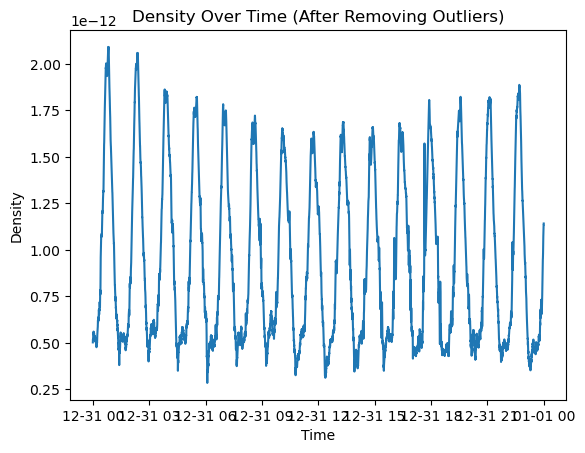

In [4]:
import os
import pandas as pd
import spacepy.pycdf as cdf
import os
import cdflib
from scipy.stats import zscore
import matplotlib.pyplot as plt



folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted2_files_2014'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

combined_df = pd.DataFrame()

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    
    cdf_file = cdf.CDF(cdf_file_path)
    
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:], 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:], 'local_solar_time': cdf_file['local_solar_time'][:]}

df = pd.DataFrame(data_dict)
combined_df = combined_df.append(df, ignore_index=True)
threshold = 3
cleaned_df = combined_df[abs(zscore(combined_df['density'])) <= threshold]
        
plt.plot(cleaned_df['time'], cleaned_df['density'])
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Density Over Time (After Removing Outliers)')
plt.show()







In [7]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


C:\Users\jose_ne\AppData\Local\Temp\ipykernel_6400\544105305.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


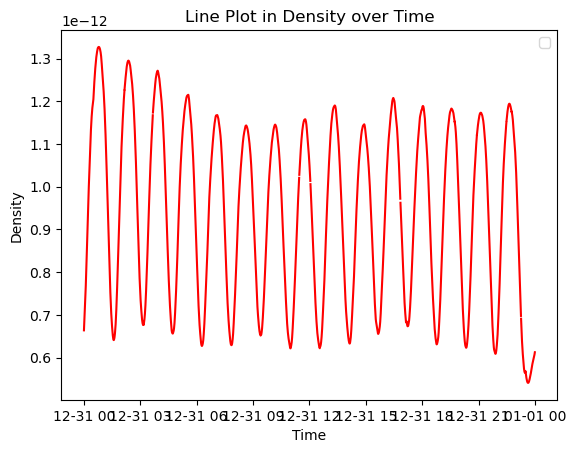

In [36]:
import os
import pandas as pd
import spacepy.pycdf as cdf
import os
import cdflib
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np



folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted2_files_2014'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

combined_df = pd.DataFrame()

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    
    cdf_file = cdf.CDF(cdf_file_path)
    
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:], 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:], 'local_solar_time': cdf_file['local_solar_time'][:]}
    
df = pd.DataFrame(data_dict)
combined_df = combined_df.append(df, ignore_index=True)
    #print(combined_df)
    
threshold = 3
z_scores = (df['density'] - df['density'].mean()) / df['density'].std()
outliers = df[abs(z_scores) > threshold]
df[abs(z_scores) > threshold] = np.nan
df.set_index('time', inplace=True)
window_size = 6*60
rolling_avg = df['density'].rolling(window=window_size, center=True, min_periods = 15).mean()
df['3min_rolling_avg'] = rolling_avg
rolling_sum = df['density'].rolling(window=window_size).sum()
df['3min_rolling_sum'] = rolling_sum
df.head(30)

plt.plot(rolling_avg, color='red')

plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Line Plot in Density over Time')

plt.legend()
plt.show()



C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_14852\2624382496.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

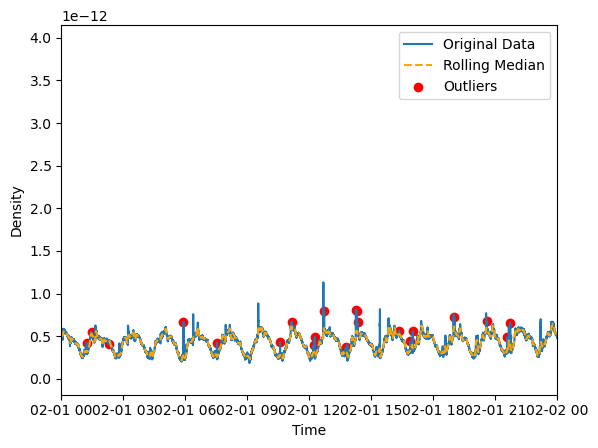

In [128]:
import os
import pandas as pd
import spacepy.pycdf as cdf
import os
import cdflib
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime



folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted2_files_2014'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

combined_df = pd.DataFrame()

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    
    cdf_file = cdf.CDF(cdf_file_path)
    
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:], 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:], 'local_solar_time': cdf_file['local_solar_time'][:]}
    
    df = pd.DataFrame(data_dict)
    combined_df = combined_df.append(df, ignore_index=True)

low_threshold = 1e-14
high_threshold = 1e6
window_size = 20 #its like 2000 kilometers
outlier_threshold = 3

combined_df = combined_df[(combined_df['density'] > low_threshold) & (combined_df['density'] < high_threshold)]
#combined_df = combined_df.dropna(subset=['density'])
combined_df['rolling_median'] = combined_df['density'].rolling(window=window_size,min_periods = 4, center=True).median()
combined_df['rolling_std'] = combined_df['density'].rolling(window=window_size,min_periods = 4, center=True).std()
combined_df['outlier'] = (abs(combined_df['density'] - combined_df['rolling_median']) / combined_df['rolling_std']) > outlier_threshold
#zscore is (abs(combined_df['density'] - combined_df['rolling_median']) / combined_df['density'].std()) then we check this zscore value greater than thresold or not
average_density = df_no_outliers['density'].mean()

plt.plot(combined_df['time'], combined_df['density'], label='Original Data')
plt.plot(combined_df['time'], combined_df['rolling_median'], label='Rolling Median', linestyle='--', color='orange')
plt.scatter(combined_df.loc[combined_df['outlier'], 'time'], combined_df.loc[combined_df['outlier'], 'density'], c='red', label='Outliers')

sdate=datetime.strptime('2014-02-01', '%Y-%m-%d')
edate=datetime.strptime('2014-02-02', '%Y-%m-%d')
plt.xlim((sdate, edate))
plt.xlabel('Time')
plt.ylabel('Density')

plt.legend()
plt.show()

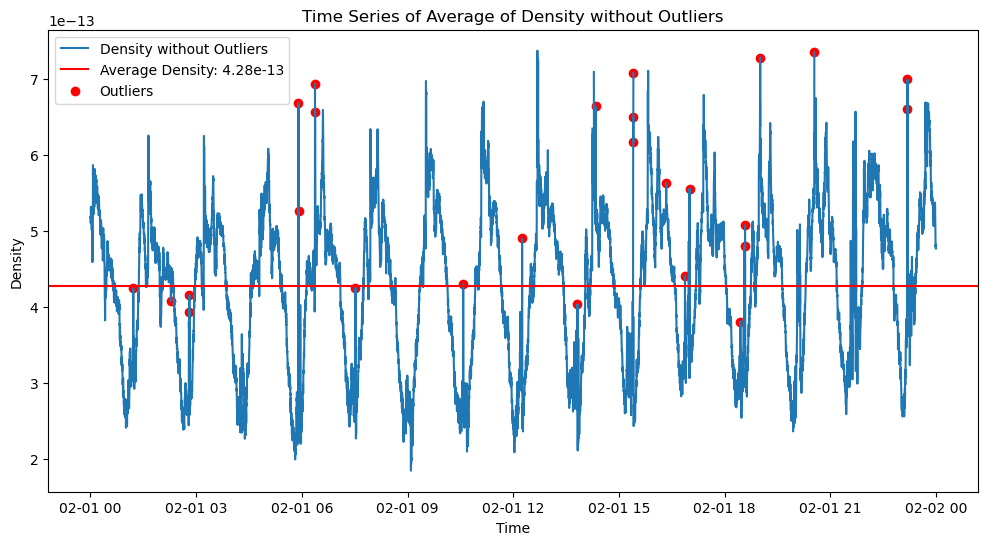

Average Density without Outliers: 4.28e-13


In [147]:
import pandas as pd
import spacepy.pycdf as cdf
import matplotlib.pyplot as plt
import numpy as np

file_path = 'SW_OPER_DNSCACC_2__20140201T000000_20140201T235950_0201.cdf'

with cdf.CDF(file_path) as cdf_file:
    variable_values = {'time': cdf_file['time'], 'density': cdf_file['density']}
    df = pd.DataFrame(variable_values)
    
low_threshold = 1e-13
high_threshold = 1e6
window_size = 50  # It's like 5000 kilometers
threshold = 3

df = df[(df['density'] > low_threshold) & (df['density'] < high_threshold)]

z_scores = (df['density'] - df['density'].mean()) / df['density'].std()
outliers = df[abs(z_scores) > threshold]
df[abs(z_scores) > threshold] = np.nan


df['rolling_median'] = df['density'].rolling(window=window_size, min_periods=20, center=True).median()
df['rolling_std'] = df['density'].rolling(window=window_size, min_periods=20, center=True).std()

df['outlier'] = (abs(df['density'] - df['rolling_median']) / df['rolling_std']) > threshold


average_density = df_no_outliers['density'].mean()

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['density'], label='Density without Outliers')
plt.axhline(y=average_density, color='red', linestyle='-', label=f'Average Density: {average_density:.2e}')
plt.scatter(df.loc[df['outlier'], 'time'], df.loc[df['outlier'], 'density'], c='red', label='Outliers')

plt.title('Time Series of Average of Density without Outliers')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.show()

print(f"Average Density without Outliers: {average_density:.2e}")


C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\27717517.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combin

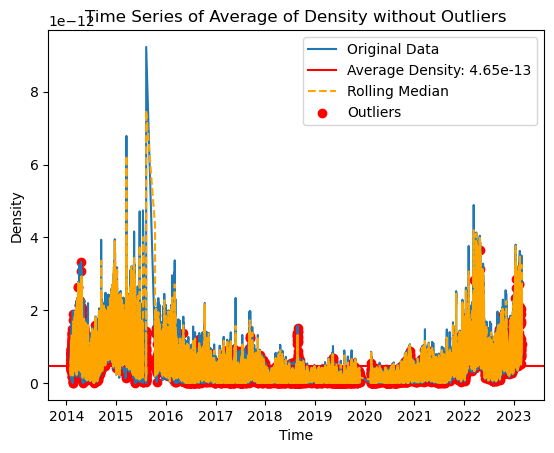

In [10]:
import os
import pandas as pd
import spacepy.pycdf as cdf
import os
import cdflib
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime



folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted_files'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

combined_df = pd.DataFrame()

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    
    cdf_file = cdf.CDF(cdf_file_path)
    
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:], 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:], 'local_solar_time': cdf_file['local_solar_time'][:]}
    
    df = pd.DataFrame(data_dict)
    combined_df = combined_df.append(df, ignore_index=True)

low_threshold = 1e-14
high_threshold = 1e6
window_size = 20 #its like 2000 kilometers
outlier_threshold = 3

combined_df = combined_df[(combined_df['density'] > low_threshold) & (combined_df['density'] < high_threshold)]
#combined_df = combined_df.dropna(subset=['density'])
combined_df['rolling_median'] = combined_df['density'].rolling(window=window_size,min_periods = 4, center=True).median()
combined_df['rolling_std'] = combined_df['density'].rolling(window=window_size,min_periods = 4, center=True).std()
combined_df['outlier'] = (abs(combined_df['density'] - combined_df['rolling_median']) / combined_df['rolling_std']) > outlier_threshold
#zscore is (abs(combined_df['density'] - combined_df['rolling_median']) / combined_df['density'].std()) then we check this zscore value greater than thresold or not
average_density = combined_df['density'].mean()

plt.plot(combined_df['time'], combined_df['density'], label='Original Data')
plt.axhline(y=average_density, color='red', linestyle='-', label=f'Average Density: {average_density:.2e}')

plt.plot(combined_df['time'], combined_df['rolling_median'], label='Rolling Median', linestyle='--', color='orange')
plt.scatter(combined_df.loc[combined_df['outlier'], 'time'], combined_df.loc[combined_df['outlier'], 'density'], c='red', label='Outliers')
plt.title('Time Series of Average of Density without Outliers')

#sdate=datetime.strptime('2014-02-01', '%Y-%m-%d')
#edate=datetime.strptime('2014-02-02', '%Y-%m-%d')
#plt.xlim((sdate, edate))
plt.xlabel('Time')
plt.ylabel('Density')

plt.legend()
plt.show()

            date       density
0     2014-02-01  4.285174e-13
1     2014-02-02  4.923360e-13
2     2014-02-03  5.109292e-13
3     2014-02-04  5.337860e-13
4     2014-02-05  5.434833e-13
...          ...           ...
3055  2023-02-24  1.145101e-12
3056  2023-02-25  1.137424e-12
3057  2023-02-26  1.303092e-12
3058  2023-02-27  1.585283e-12
3059  2023-02-28  1.380089e-12

[3060 rows x 2 columns]


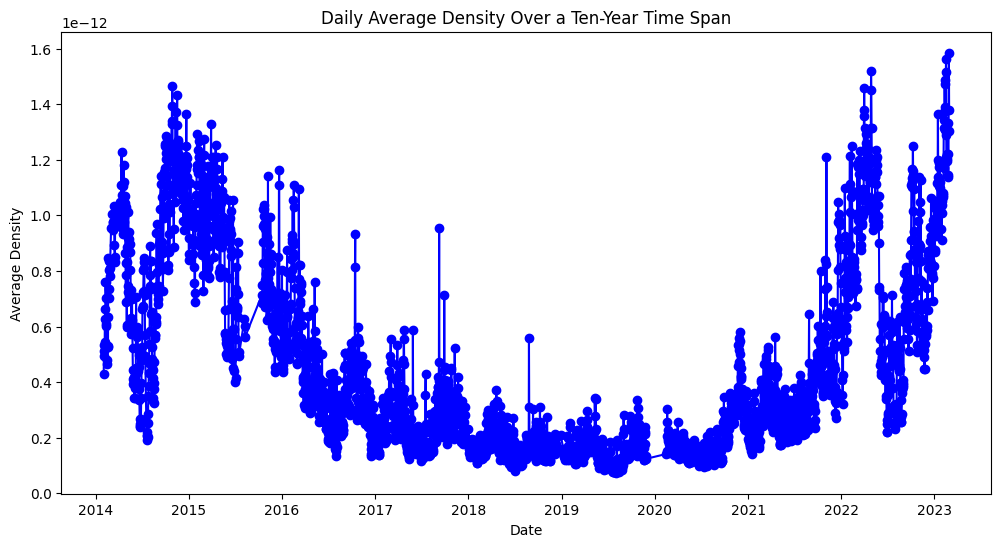

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\jose_ne\AppData\Local\Temp\ipykernel_19152\4197899714.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df 

            date       density
0     2014-02-01  4.285174e-13
1     2014-02-02  4.923360e-13
2     2014-02-03  5.109292e-13
3     2014-02-04  5.337860e-13
4     2014-02-05  5.434833e-13
...          ...           ...
3055  2023-02-24  1.145101e-12
3056  2023-02-25  1.137424e-12
3057  2023-02-26  1.303092e-12
3058  2023-02-27  1.585283e-12
3059  2023-02-28  1.380089e-12

[3060 rows x 2 columns]


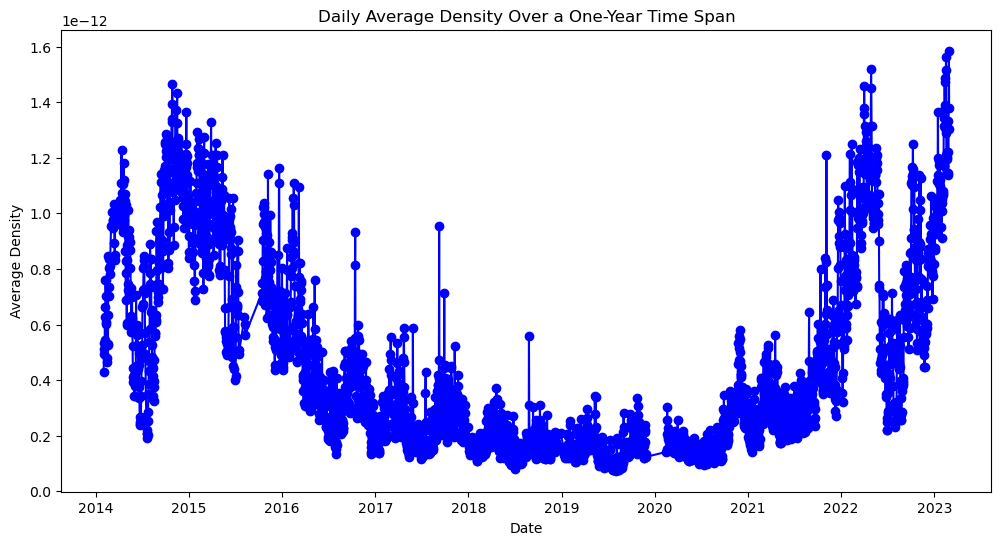

In [11]:
import os
import pandas as pd
import spacepy.pycdf as cdf
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted_files'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

combined_df = pd.DataFrame()

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    
    cdf_file = cdf.CDF(cdf_file_path)
    
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:], 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:], 'local_solar_time': cdf_file['local_solar_time'][:]}
    
    df = pd.DataFrame(data_dict)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

low_threshold = 1e-14
high_threshold = 1e6
window_size = 50  # It's like 5000 kilometers
threshold = 3
combined_df = combined_df[(combined_df['density'] > low_threshold) & (combined_df['density'] < high_threshold)]
z_scores = (combined_df['density'] - combined_df['density'].mean()) / combined_df['density'].std()
outliers = combined_df[abs(z_scores) > threshold]
combined_df[abs(z_scores) > threshold] = np.nan


combined_df['rolling_median'] = combined_df['density'].rolling(window=window_size, min_periods=20, center=True).median()
combined_df['rolling_std'] = combined_df['density'].rolling(window=window_size, min_periods=20, center=True).std()

combined_df['outlier'] = (abs(combined_df['density'] - combined_df['rolling_median']) / combined_df['rolling_std']) > threshold


combined_df['date'] = pd.to_datetime(combined_df['time']).dt.date
daily_average_density = combined_df.groupby('date')['density'].mean().reset_index()
print(daily_average_density)

plt.figure(figsize=(12, 6))
plt.plot(daily_average_density['date'], daily_average_density['density'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Average Density')
plt.title('Daily Average Density Over a Ten-Year Time Span')
plt.show()

           date       density
0    2014-02-01  4.285174e-13
1    2014-02-02  4.923360e-13
2    2014-02-03  5.109292e-13
3    2014-02-04  5.337860e-13
4    2014-02-05  5.434833e-13
..          ...           ...
306  2014-12-27  1.209198e-12
307  2014-12-28  1.144419e-12
308  2014-12-29  1.301810e-12
309  2014-12-30  1.178942e-12
310  2014-12-31  9.391335e-13

[311 rows x 2 columns]


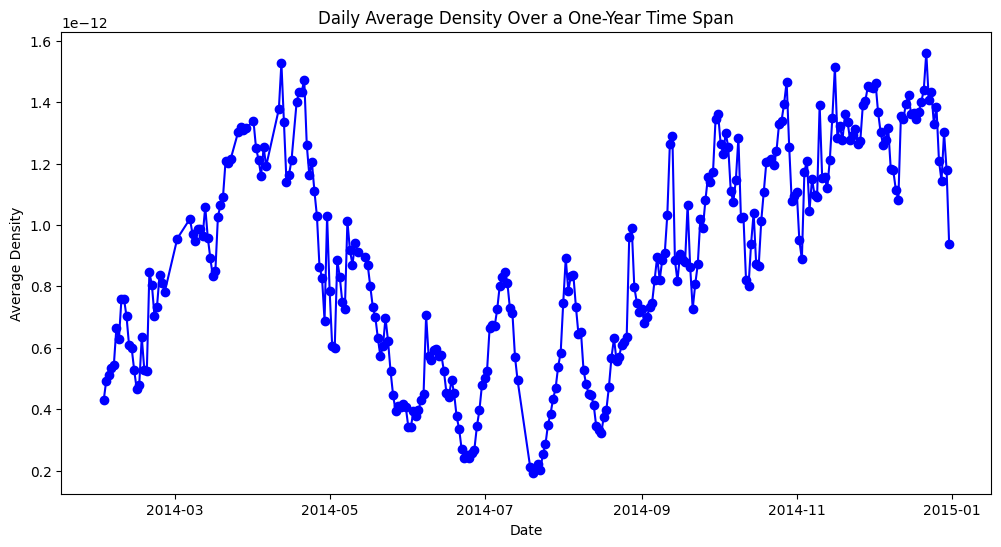

<Figure size 640x480 with 0 Axes>

In [7]:
import os
import pandas as pd
import spacepy.pycdf as cdf
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted2_files_2014'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

combined_df = pd.DataFrame()

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    
    cdf_file = cdf.CDF(cdf_file_path)
    
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:], 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:], 'local_solar_time': cdf_file['local_solar_time'][:]}
    
    df = pd.DataFrame(data_dict)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

low_threshold = 1e-14
high_threshold = 1e6
window_size = 50  # It's like 5000 kilometers
threshold = 3
combined_df = combined_df[(combined_df['density'] > low_threshold) & (combined_df['density'] < high_threshold)]
z_scores = (combined_df['density'] - combined_df['density'].mean()) / combined_df['density'].std()
outliers = combined_df[abs(z_scores) > threshold]
combined_df[abs(z_scores) > threshold] = np.nan


combined_df['rolling_median'] = combined_df['density'].rolling(window=window_size, min_periods=20, center=True).median()
combined_df['rolling_std'] = combined_df['density'].rolling(window=window_size, min_periods=20, center=True).std()

combined_df['outlier'] = (abs(combined_df['density'] - combined_df['rolling_median']) / combined_df['rolling_std']) > threshold


combined_df['date'] = pd.to_datetime(combined_df['time']).dt.date
daily_average_density = combined_df.groupby('date')['density'].mean().reset_index()
print(daily_average_density)

plt.figure(figsize=(12, 6))
plt.plot(daily_average_density['date'], daily_average_density['density'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Average Density')
plt.title('Daily Average Density Over a One-Year Time Span')
plt.show()
plt.savefig('thermosphereaver_ageden_2014.png')

           date       density       altitude
0    2014-02-01  4.285174e-13  506143.002855
1    2014-02-02  4.923360e-13  506217.898055
2    2014-02-03  5.109292e-13  505773.076247
3    2014-02-04  5.337860e-13  505951.789146
4    2014-02-05  5.434833e-13  506163.049000
..          ...           ...            ...
306  2014-12-27  1.209198e-12  470430.768060
307  2014-12-28  1.144419e-12  469973.476959
308  2014-12-29  1.301810e-12  469942.049354
309  2014-12-30  1.178942e-12  470176.334870
310  2014-12-31  9.391335e-13  469867.659684

[311 rows x 3 columns]


C:\Users\jose_ne\AppData\Local\Temp\ipykernel_17592\337795104.py:44: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)


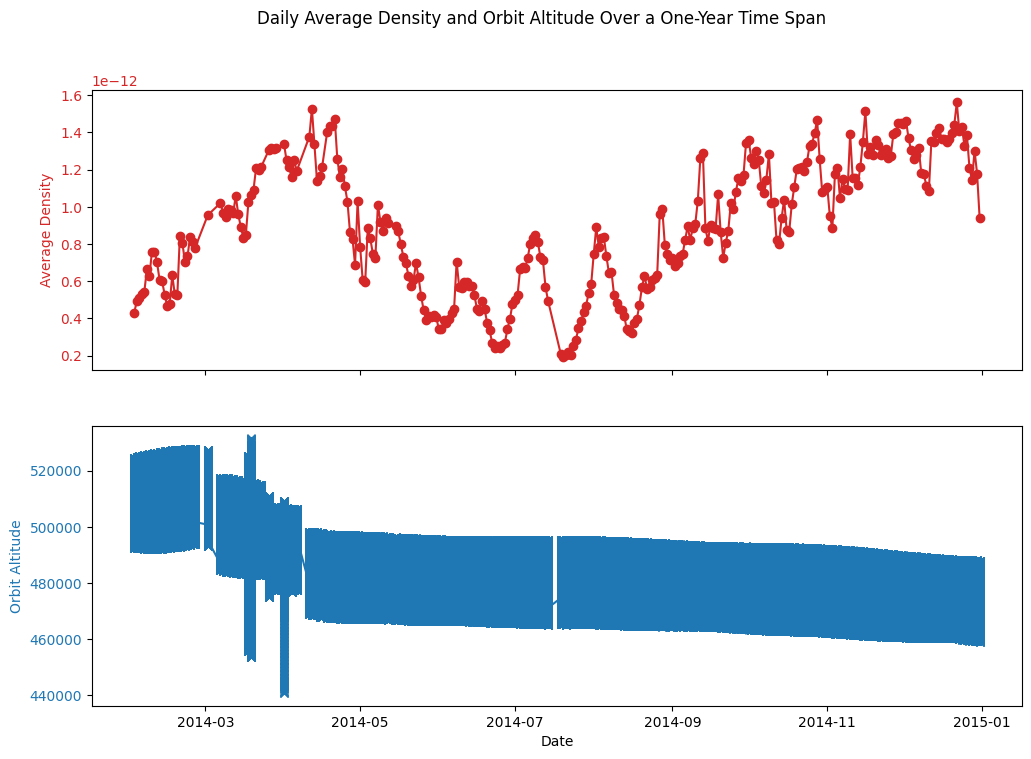

In [17]:
import os
import pandas as pd
import spacepy.pycdf as cdf
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted2_files_2014'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

combined_df = pd.DataFrame()

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    
    cdf_file = cdf.CDF(cdf_file_path)
    
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:], 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:], 'local_solar_time': cdf_file['local_solar_time'][:]}
    
    df = pd.DataFrame(data_dict)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

low_threshold = 1e-14
high_threshold = 1e6
window_size = 50  # It's like 5000 kilometers
threshold = 3

combined_df = combined_df[(combined_df['density'] > low_threshold) & (combined_df['density'] < high_threshold)]
z_scores = (combined_df['density'] - combined_df['density'].mean()) / combined_df['density'].std()
outliers = combined_df[abs(z_scores) > threshold]
combined_df[abs(z_scores) > threshold] = np.nan

combined_df['rolling_median'] = combined_df['density'].rolling(window=window_size, min_periods=20, center=True).median()
combined_df['rolling_std'] = combined_df['density'].rolling(window=window_size, min_periods=20, center=True).std()

combined_df['outlier'] = (abs(combined_df['density'] - combined_df['rolling_median']) / combined_df['rolling_std']) > threshold

combined_df['date'] = pd.to_datetime(combined_df['time']).dt.date
daily_average_density = combined_df.groupby('date')[['density', 'altitude']].mean().reset_index()
print(daily_average_density)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

color = 'tab:red'
ax1.set_ylabel('Average Density', color=color)
ax1.plot(pd.to_datetime(daily_average_density['date']), daily_average_density['density'], marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2.set_ylabel('Orbit Altitude', color='tab:blue')
ax2.plot(pd.to_datetime(combined_df['date']), combined_df['altitude'], marker='x', linestyle='-', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.xlabel('Date')
fig.suptitle('Daily Average Density and Orbit Altitude Over a One-Year Time Span', y=0.98)
plt.savefig('Daily average density_timeseries_altitude.png')
plt.show()


            date       density       altitude
0     2014-02-01  4.285174e-13  506143.002855
1     2014-02-02  4.923360e-13  506217.898055
2     2014-02-03  5.109292e-13  505773.076247
3     2014-02-04  5.337860e-13  505951.789146
4     2014-02-05  5.434833e-13  506163.049000
...          ...           ...            ...
3055  2023-02-24  1.145101e-12  472570.078674
3056  2023-02-25  1.137424e-12  472211.321925
3057  2023-02-26  1.303092e-12  472617.154700
3058  2023-02-27  1.585283e-12  476749.351426
3059  2023-02-28  1.380089e-12  473949.092060

[3060 rows x 3 columns]


C:\Users\jose_ne\AppData\Local\Temp\ipykernel_17592\4110222448.py:44: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)


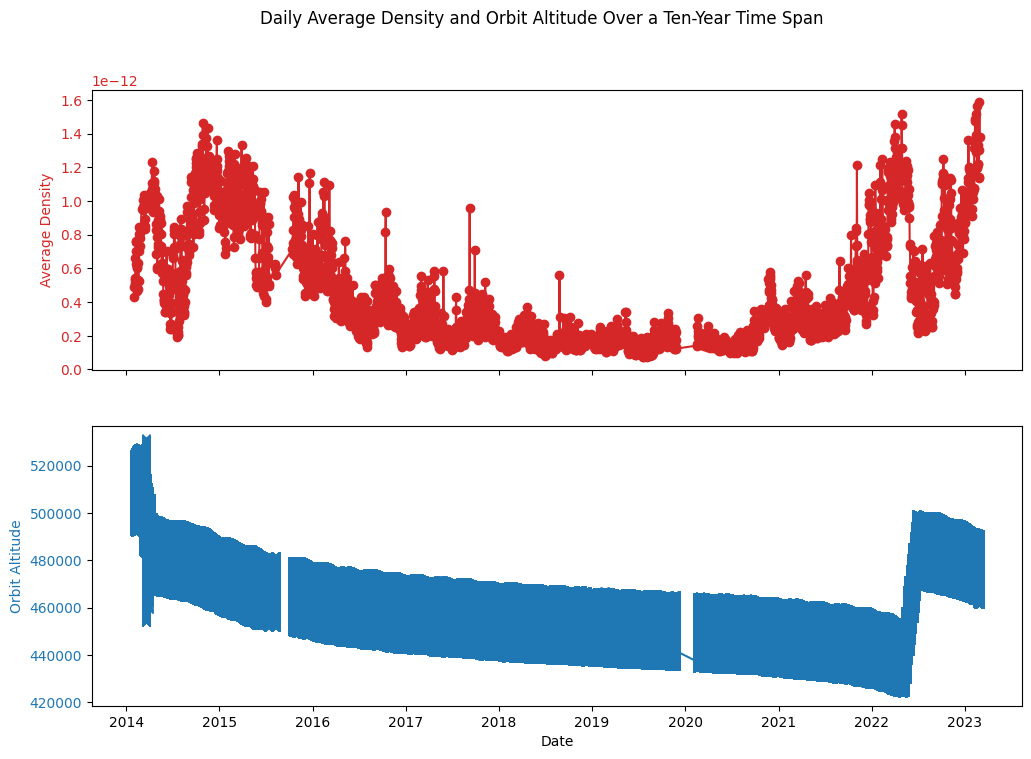

In [19]:
import os
import pandas as pd
import spacepy.pycdf as cdf
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted_files'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

combined_df = pd.DataFrame()

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    
    cdf_file = cdf.CDF(cdf_file_path)
    
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:], 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:], 'local_solar_time': cdf_file['local_solar_time'][:]}
    
    df = pd.DataFrame(data_dict)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

low_threshold = 1e-14
high_threshold = 1e6
window_size = 50  # It's like 5000 kilometers
threshold = 3

combined_df = combined_df[(combined_df['density'] > low_threshold) & (combined_df['density'] < high_threshold)]
z_scores = (combined_df['density'] - combined_df['density'].mean()) / combined_df['density'].std()
outliers = combined_df[abs(z_scores) > threshold]
combined_df[abs(z_scores) > threshold] = np.nan

combined_df['rolling_median'] = combined_df['density'].rolling(window=window_size, min_periods=20, center=True).median()
combined_df['rolling_std'] = combined_df['density'].rolling(window=window_size, min_periods=20, center=True).std()

combined_df['outlier'] = (abs(combined_df['density'] - combined_df['rolling_median']) / combined_df['rolling_std']) > threshold

combined_df['date'] = pd.to_datetime(combined_df['time']).dt.date
daily_average_density = combined_df.groupby('date')[['density', 'altitude']].mean().reset_index()
print(daily_average_density)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

color = 'tab:red'
ax1.set_ylabel('Average Density', color=color)
ax1.plot(pd.to_datetime(daily_average_density['date']), daily_average_density['density'], marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2.set_ylabel('Orbit Altitude', color='tab:blue')
ax2.plot(pd.to_datetime(combined_df['date']), combined_df['altitude'], marker='x', linestyle='-', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.xlabel('Date')
fig.suptitle('Daily Average Density and Orbit Altitude Over a Ten-Year Time Span', y=0.98)
plt.savefig('Tenyear_Daily average density_timeseries_altitude.png')
plt.show()

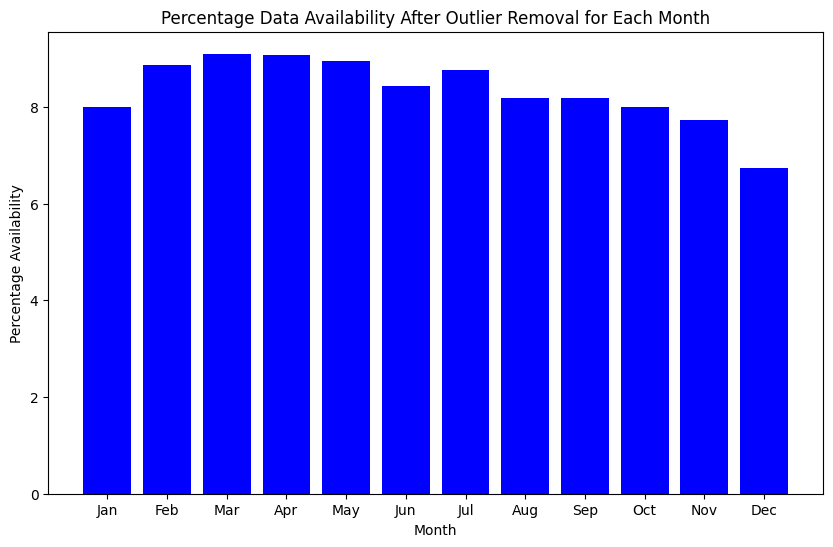

In [4]:
import os
import pandas as pd
import spacepy.pycdf as cdf
import os
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime



folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted_files'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

dfs = []  # List to store DataFrames

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    cdf_file = cdf.CDF(cdf_file_path)
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:],
                 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:],
                 'local_solar_time': cdf_file['local_solar_time'][:]}
    df = pd.DataFrame(data_dict)
    dfs.append(df)

low_threshold = 1e-14
high_threshold = 1e6
window_size = 20 #its like 2000 kilometers
outlier_threshold = 3

combined_df = pd.concat(dfs, ignore_index=True)
combined_df = combined_df[(combined_df['density'] > low_threshold) & (combined_df['density'] < high_threshold)]
#combined_df = combined_df.dropna(subset=['density'])
combined_df['rolling_median'] = combined_df['density'].rolling(window=window_size,min_periods = 4, center=True).median()
combined_df['rolling_std'] = combined_df['density'].rolling(window=window_size,min_periods = 4, center=True).std()
combined_df['outlier'] = (abs(combined_df['density'] - combined_df['rolling_median']) / combined_df['rolling_std']) > outlier_threshold

# Data availability after outlier removal for each month
combined_df['month'] = combined_df['time'].dt.month
availability_per_month = combined_df.groupby('month')['density'].count() / len(combined_df) * 100

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(availability_per_month.index, availability_per_month.values, color='blue')
plt.title('Percentage Data Availability After Outlier Removal for Each Month')
plt.xlabel('Month')
plt.ylabel('Percentage Availability')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [10]:
pip install seaborn

   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.8 kB ? eta -:--:--
   ------------ --------------------------- 92.2/294.8 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.8/294.8 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


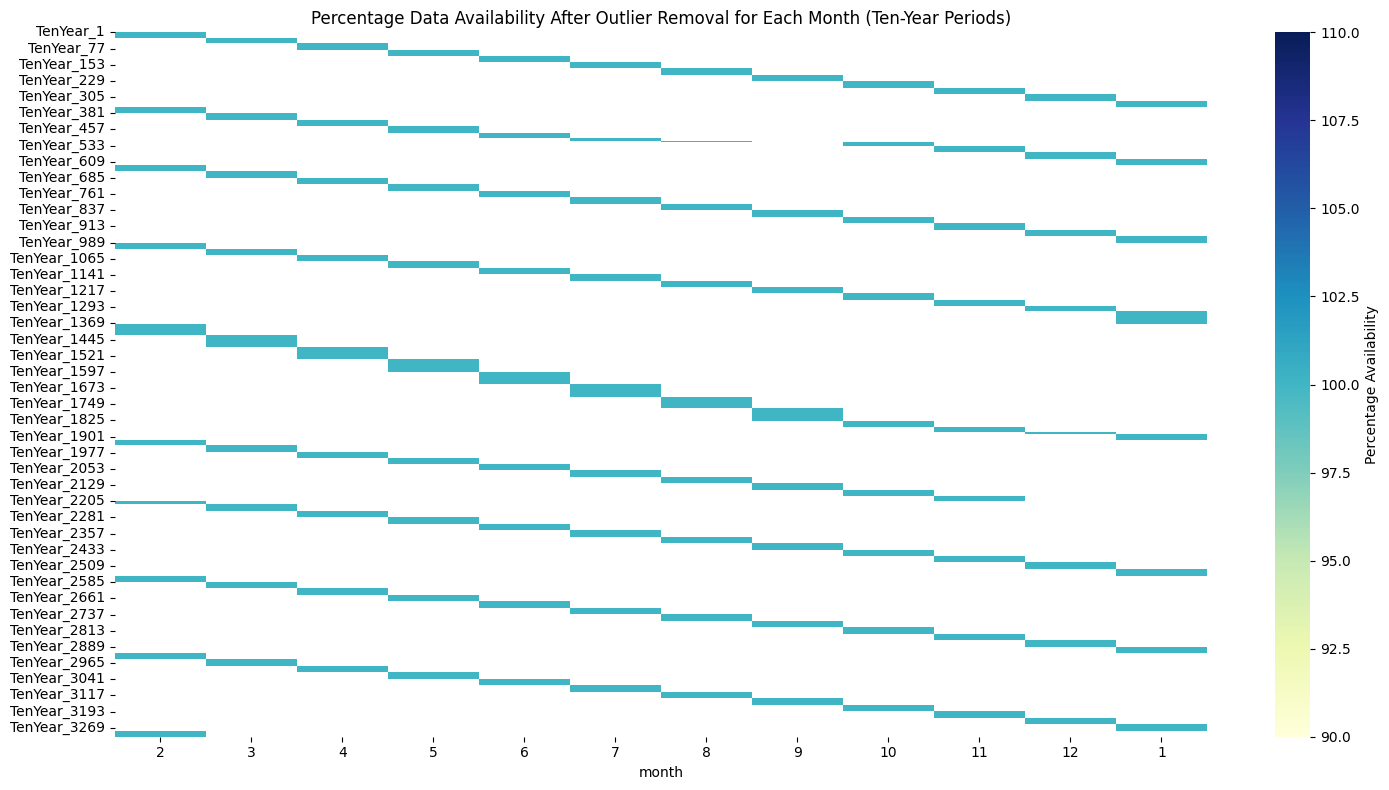

In [11]:
import os
import pandas as pd
import spacepy.pycdf as cdf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted_files'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

# Initialize a figure with a single subplot
fig, ax = plt.subplots(figsize=(15, 8))

dfs = []  # List to store DataFrames

for i, cdf_filename in enumerate(cdf_files):
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    cdf_file = cdf.CDF(cdf_file_path)
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:],
                 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:],
                 'local_solar_time': cdf_file['local_solar_time'][:]}
    df = pd.DataFrame(data_dict)
    
    low_threshold = 1e-14
    high_threshold = 1e6
    window_size = 20  # it's like 2000 kilometers
    outlier_threshold = 3
    
    df = df[(df['density'] > low_threshold) & (df['density'] < high_threshold)]
    df['rolling_median'] = df['density'].rolling(window=window_size, min_periods=4, center=True).median()
    df['rolling_std'] = df['density'].rolling(window=window_size, min_periods=4, center=True).std()
    df['outlier'] = (abs(df['density'] - df['rolling_median']) / df['rolling_std']) > outlier_threshold
    
    # Data availability after outlier removal for each month
    df['month'] = df['time'].dt.month
    availability_per_month = df.groupby('month')['density'].count() / len(df) * 100
    dfs.append(availability_per_month)

# Concatenate availability DataFrames for each file
availability_df = pd.concat(dfs, axis=1)
availability_df.columns = [f'TenYear_{i+1}' for i in range(len(cdf_files))]

# Plot the results as a heatmap
sns.heatmap(availability_df.T, cmap='YlGnBu', ax=ax, cbar_kws={'label': 'Percentage Availability'})
ax.set_title('Percentage Data Availability After Outlier Removal for Each Month (Ten-Year Periods)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [16]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
import numpy as np

def normalize_density(altitude, density, reference_altitude, temperature, mean_molecular_mass, gravity):
    H_reference = (8.314 * temperature) / (mean_molecular_mass * gravity)
    H = (8.314 * temperature) / (mean_molecular_mass * gravity)
    normalized_density = density * np.exp((reference_altitude - altitude) / H_reference)
    return normalized_density

file_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted2_files_2014'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]
dfs = [] 

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    cdf_file = cdf.CDF(cdf_file_path)
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:],
                 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:],
                 'local_solar_time': cdf_file['local_solar_time'][:]}
    df = pd.DataFrame(data_dict)
    dfs.append(df)

altitude_data = cdf_file['altitude'][:]
density_data = cdf_file['density'][:]
# Example values
reference_altitude = 400
temperature = 250  # Example temperature in Kelvin
mean_molecular_mass = 28.97  # Example mean molecular mass of Earth's atmosphere
gravity = 9.81  # Example gravity on Earth

# Normalize the density values at the chosen reference altitude
normalized_density_data = [normalize_density(altitude, density, reference_altitude, temperature, mean_molecular_mass, gravity)
                           for altitude, density in zip(altitude_data, density_data)]

print("Original Density:", density_data)
print("Normalized Density:", normalized_density_data)


Original Density: [1.74543472e-12 1.75563885e-12 1.78102289e-12 ... 1.45331293e-12
 1.46087384e-12 1.45361132e-12]
Normalized Density: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacepy.pycdf as cdf

def normalize_density(altitude, density, reference_altitude, temperature, mean_molecular_mass, gravity):
    H_reference = (8.314 * temperature) / (mean_molecular_mass * gravity)
    H = (8.314 * temperature) / (mean_molecular_mass * gravity)
    normalized_density = density * np.exp((reference_altitude - altitude) / H_reference)
    return normalized_density

file_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted2_files_2014'
cdf_files = [file for file in os.listdir(file_path) if file.endswith('.cdf')]
dfs = [] 

for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(file_path, cdf_filename)
    cdf_file = cdf.CDF(cdf_file_path)
    variable_names = list(cdf_file.keys())
    data_dict = {'time': cdf_file['time'][:], 'density': cdf_file['density'][:], 'altitude': cdf_file['altitude'][:],
                 'latitude': cdf_file['latitude'][:], 'longitude': cdf_file['longitude'][:],
                 'local_solar_time': cdf_file['local_solar_time'][:]}
    df = pd.DataFrame(data_dict)
    dfs.append(df)

altitude_data = cdf_file['altitude'][:]
density_data = cdf_file['density'][:]
data = pd.concat(dfs, ignore_index=True)

reference_altitude = 400
temperature = 250  # Example temperature in Kelvin
mean_molecular_mass = 28.97  # Example mean molecular mass of Earth's atmosphere
gravity = 9.81  # Example gravity on Earth

# Normalize the density values at the chosen reference altitude
data['Normalized_Density'] = normalize_density(data['altitude'], data['density'], reference_altitude, temperature, mean_molecular_mass, gravity)

fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar graph with color-coded density over latitude
bars = ax.bar(data['latitude'], data['Normalized_Density'], color='skyblue')

# Add labels and title
ax.set_xlabel('Latitude')
ax.set_ylabel('Normalized Density')
ax.set_title('Normalized Thermosphere Density Over Latitude')

plt.show()

In [1]:
import subprocess

# Specify the package name
package_name = "aacgmv2"

# Use subprocess to run the pip install command
try:
    subprocess.check_call(["pip", "install", package_name])
    print(f"Successfully installed {package_name}")
except subprocess.CalledProcessError:
    print(f"Error installing {package_name}")


Error installing aacgmv2


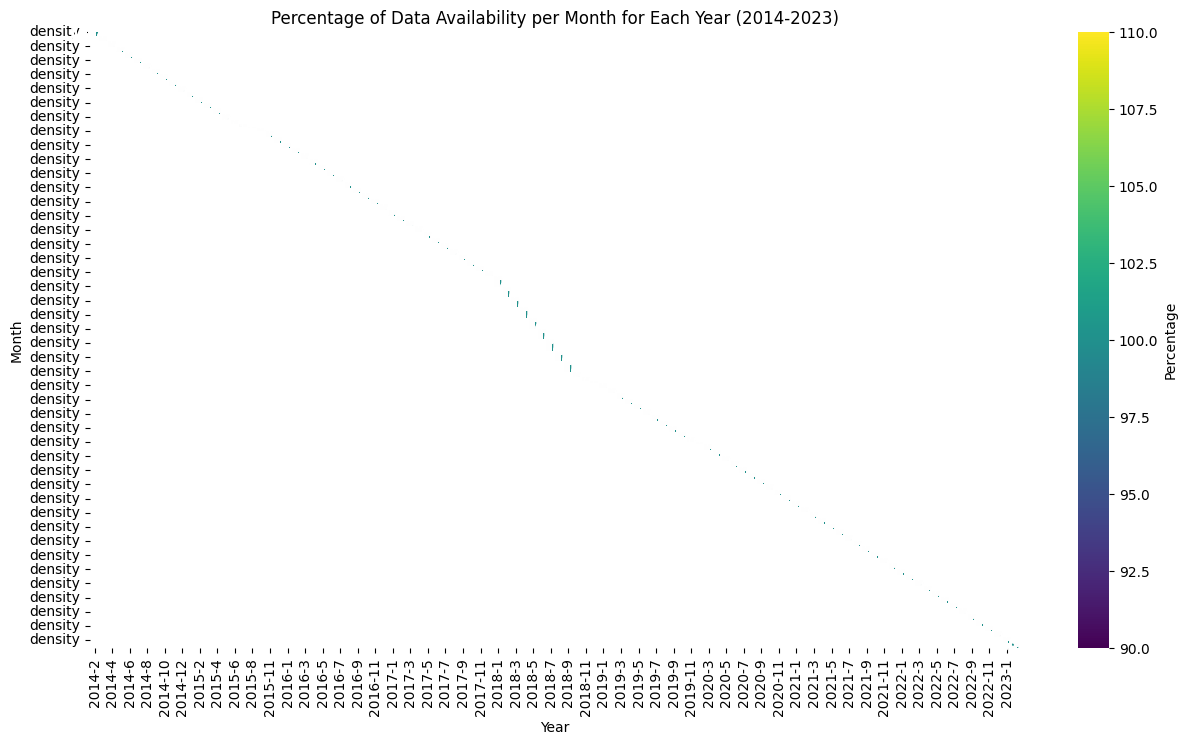

In [6]:
import os
import pandas as pd
import spacepy.pycdf as cdf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted_files'
cdf_files = [file for file in os.listdir(folder_path) if file.endswith('.cdf')]

dfs = []

# Iterate over CDF files in the folder
for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)
    cdf_file = cdf.CDF(cdf_file_path)
    
    # Extract relevant information
    time = pd.to_datetime(cdf_file['time'][:])
    density = cdf_file['density'][:]
    
    # Create a DataFrame for the current CDF file
    df = pd.DataFrame({'time': time, 'density': density})
    
    # Extract year and month
    df['Year'] = df['time'].dt.year
    df['Month'] = df['time'].dt.month
    
    # Calculate percentage of data availability
    df['density'] = 1  # Assuming a value of 1 means data is available
    availability_percentage = df.groupby(['Year', 'Month'])['density'].mean() * 100
    
    # Append to the list of DataFrames
    dfs.append(availability_percentage)

# Concatenate individual DataFrames into one
df_combined = pd.concat(dfs, axis=1)

# Plot the matrix as an image
plt.figure(figsize=(15, 8))
sns.heatmap(df_combined.T, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Percentage'})
plt.title('Percentage of Data Availability per Month for Each Year (2014-2023)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


In [7]:
pip install calmap


Note: you may need to restart the kernel to use updated packages.


### Data availability percentage before outlier removal

Month         1          2          3          4          5         6   \
Year                                                                     
2014         NaN   7.788162   8.099688   9.657321   9.034268  9.345794   
2015   11.313869  10.218978  11.313869  10.948905  11.313869  9.489051   
2016    7.967033   7.967033   8.516484   8.241758   8.516484  8.241758   
2017    8.781870   7.932011   7.648725   8.498584   8.781870  8.498584   
2018   10.380623   8.823529   9.515571  10.207612  10.034602  9.861592   
2019    7.667732   8.945687   9.904153   8.626198   9.265176  9.584665   
2020         NaN   4.375000   9.687500   9.375000   9.687500  9.375000   
2021    8.516484   7.692308   8.516484   8.241758   8.516484  8.241758   
2022    8.493151   7.671233   8.493151   8.219178   8.493151  8.219178   
2023   52.542373  47.457627        NaN        NaN        NaN       NaN   

Month         7         8          9         10         11         12  
Year                                   

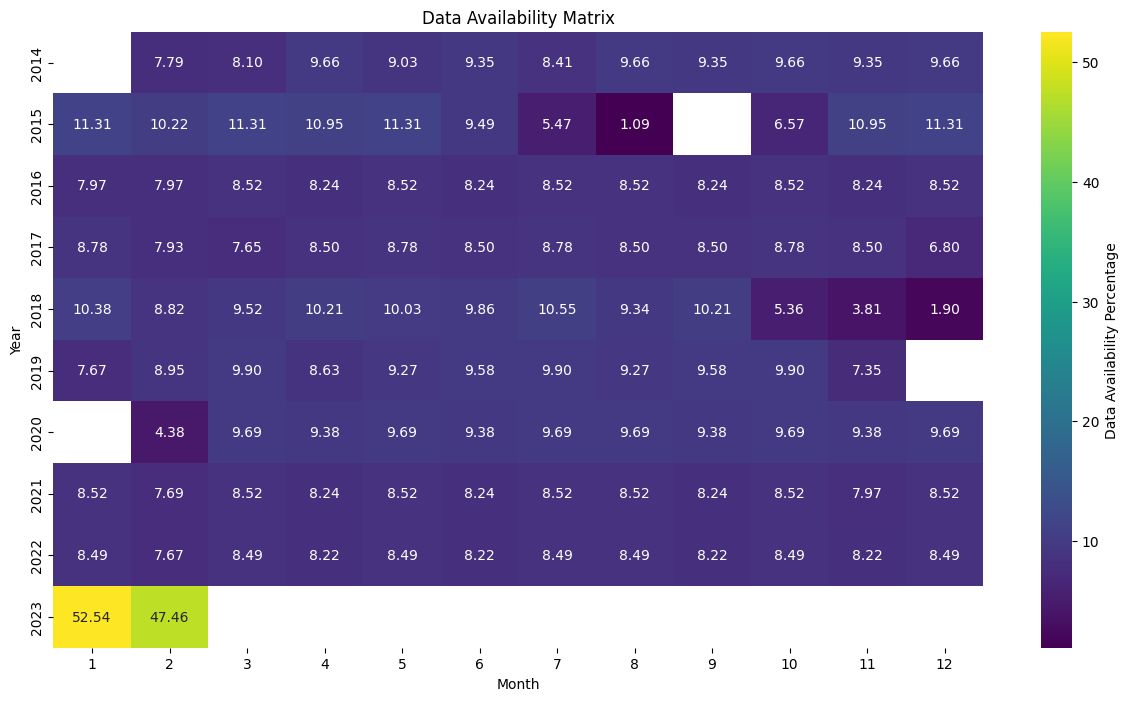

In [13]:
import os
import spacepy.pycdf as cdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted_files'

# Get a list of all files in the folder
all_files = os.listdir(folder_path)

# Filter out only CDF files
cdf_files = [file for file in all_files if file.endswith('.cdf')]

# List to store individual DataFrames for each CDF file
dfs = []

# Iterate over each CDF file
for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)

    # Open the CDF file
    with cdf.CDF(cdf_file_path) as cdf_file:
        # Extract relevant information
        time_data = pd.to_datetime(cdf_file['time'][:])
        # Add additional columns as needed

        # Example: Assuming 'density' represents data availability
        data_dict = {'time': time_data, 'density': cdf_file['density'][:]}
        df = pd.DataFrame(data_dict)

        # Append to the list of DataFrames
        dfs.append(df)

# Concatenate individual DataFrames into one
df_combined = pd.concat(dfs, ignore_index=True)

# Extract year and month from the Date column
df_combined['Year'] = df_combined['time'].dt.year
df_combined['Month'] = df_combined['time'].dt.month

# Calculate data availability percentage for each year and each month
availability_percentage = df_combined.groupby(['Year', 'Month'])['density'].count() / df_combined.groupby('Year')['density'].count() * 100

# Create a pivot table for data availability
availability_matrix = availability_percentage.unstack()
print(availability_matrix)
# Plot the matrix as a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(availability_matrix, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Data Availability Percentage'})
plt.title('Data Availability Matrix')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


### Data availability percentage after outlier removal

Month        1.0        2.0        3.0        4.0        5.0        6.0   \
Year                                                                       
2014.0        NaN   8.379743   7.401982   7.835631   9.812475  10.145358   
2015.0  10.855023   9.923862  11.415332  10.002903  10.589408   9.904057   
2016.0   8.055473   7.951777   8.455240   8.238225   8.567365   8.176124   
2017.0   8.856618   8.033769   7.691515   8.444153   8.877772   8.596628   
2018.0  10.405839   9.633405  10.523069  10.376889   9.220501   8.257780   
2019.0   7.285584   9.262534  10.118426  10.016240   7.463328   8.039424   
2020.0        NaN   3.889464   9.446219   9.591270  10.883399   9.759337   
2021.0   8.648897   8.568738   8.589076   8.210503   8.203698   7.776607   
2022.0   8.216579   7.757217   9.009897   5.120635   6.994761   8.573112   
2023.0  53.726690  46.273310        NaN        NaN        NaN        NaN   

Month        7.0        8.0        9.0        10.0       11.0       12.0  
Year        

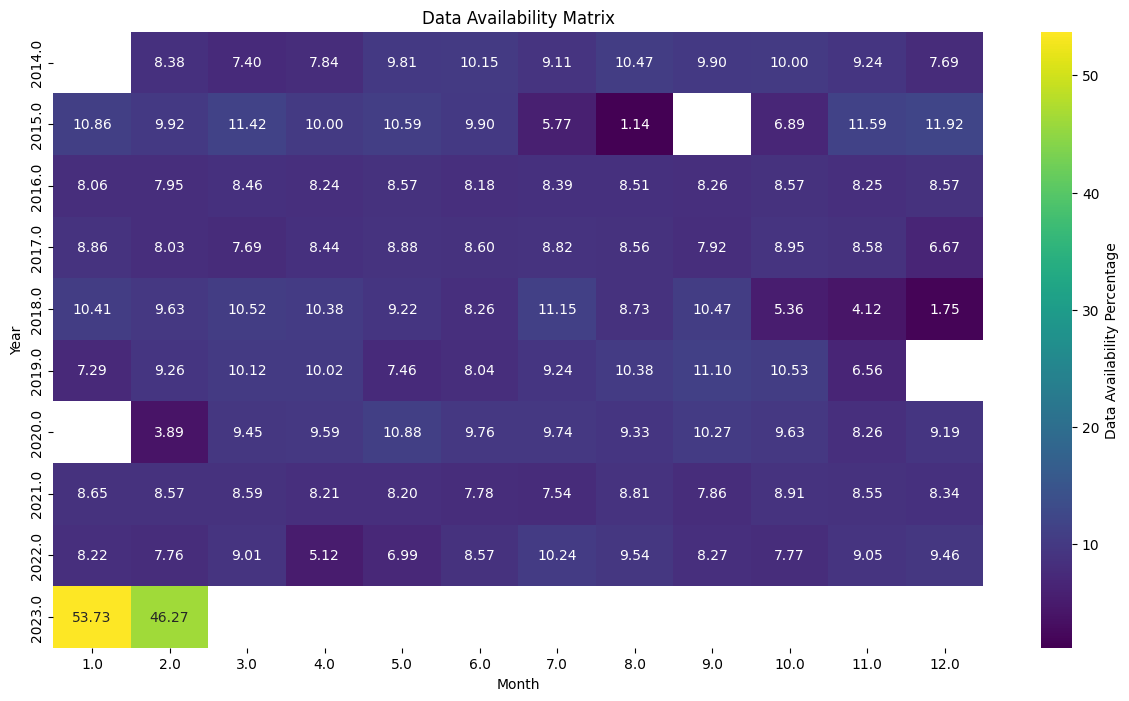

In [19]:
import os
import spacepy.pycdf as cdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

folder_path = 'C:/Users/jose_ne/Downloads/THERMOSPHERE/extracted_files'

# Get a list of all files in the folder
all_files = os.listdir(folder_path)

# Filter out only CDF files
cdf_files = [file for file in all_files if file.endswith('.cdf')]

# List to store individual DataFrames for each CDF file
dfs = []

# Iterate over each CDF file
for cdf_filename in cdf_files:
    cdf_file_path = os.path.join(folder_path, cdf_filename)

    # Open the CDF file
    with cdf.CDF(cdf_file_path) as cdf_file:
        # Extract relevant information
        time_data = pd.to_datetime(cdf_file['time'][:])
        # Add additional columns as needed

        # Example: Assuming 'density' represents data availability
        data_dict = {'time': time_data, 'density': cdf_file['density'][:]}
        df = pd.DataFrame(data_dict)

        # Append to the list of DataFrames
        dfs.append(df)

# Concatenate individual DataFrames into one
df_combined = pd.concat(dfs, ignore_index=True)

low_threshold = 1e-14
high_threshold = 1e6
window_size = 50  # It's like 5000 kilometers
threshold = 3
df_combined = df_combined[(df_combined['density'] > low_threshold) & (df_combined['density'] < high_threshold)]
z_scores = (df_combined['density'] - df_combined['density'].mean()) / df_combined['density'].std()
outliers = df_combined[abs(z_scores) > threshold]
df_combined[abs(z_scores) > threshold] = np.nan

# Extract year and month from the Date column
df_combined['Year'] = df_combined['time'].dt.year
df_combined['Month'] = df_combined['time'].dt.month

# Calculate data availability percentage for each year and each month
availability_percentage = df_combined.groupby(['Year', 'Month'])['density'].count() / df_combined.groupby('Year')['density'].count() * 100

# Create a pivot table for data availability
availability_matrix = availability_percentage.unstack()
print(availability_matrix)
# Plot the matrix as a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(availability_matrix, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Data Availability Percentage'})
plt.title('Data Availability Matrix')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()